# Covid Dataset

**Required Dataset features and target**

The dataset has 53 columns; 1 to represent the country, 1 to represent the day (it will be an integer), 50 floats to represent the positive cases of the 50 previous days, and 1 column to represent the output that is the average of a full week of cases.

![required_features.jpg](https://drive.google.com/uc?id=1smUwSHRwMT8h-M8kjG3ymmxdhQbe1HvY)


In [1]:
# Installing Incremental learner: Scikit-Multiflow
!pip install scikit-multiflow


# Overdiding some files from scikit multiflow library
!gdown https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
!unzip /content/src.zip -d /content/src
!cp -r /content/src/src /content/
!rm -r /content/src/src

# Creating a seperate directory to store all csv's
! mkdir -p /content/csv_files
! mkdir -p /content/csv_files/processed_null
! mkdir -p /content/csv_files/processed
! mkdir -p /content/Result/exp1
! mkdir -p /content/Result/exp2
! mkdir -p /content/Result/exp1/runtime
! mkdir -p /content/Result/exp2/runtime
! mkdir -p /content/Result/exp1/summary
! mkdir -p /content/Result/exp2/summary
! mkdir -p /content/Plots
! mkdir -p /content/Plots/barplot
! mkdir -p /content/Plots/boxplots
! mkdir -p /content/Result/exp1/united_dataframe
! mkdir -p /content/Result/exp1/united_dataframe/incremental
! mkdir -p /content/Result/exp1/united_dataframe/static
! mkdir -p /content/Result/exp2/united_dataframe
! mkdir -p /content/Result/exp2/united_dataframe/incremental
! mkdir -p /content/Result/exp2/united_dataframe/static

# Download the zip file
"""
!zip -r /content/file.zip /content/csv_files
from google.colab import files
files.download("/content/file.zip")
"""

Downloading...
From: https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
To: /content/src.zip
100% 26.1k/26.1k [00:00<00:00, 23.3MB/s]
Archive:  /content/src.zip
  inflating: /content/src/src/_classification_performance_evaluator.py  
  inflating: /content/src/src/base_evaluator.py  
  inflating: /content/src/src/constants.py  
  inflating: /content/src/src/evaluate_prequential.py  
  inflating: /content/src/src/evaluation_data_buffer.py  
  inflating: /content/src/src/measure_collection.py  


'\n!zip -r /content/file.zip /content/csv_files\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

In [2]:
# For Box plot: Run this only if manually uploaded the results
!unzip /content/Result.zip -d /content/Result
!cp -r /content/Result/content/Result /content/
!rm -r /content/Result/content/Result
!rm -r /content/Result/content

csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'
exp1_static_united_df_path = '/content/Result/exp1/united_dataframe/static'
exp1_inc_united_df_path = '/content/Result/exp1/united_dataframe/incremental'
exp2_static_united_df_path = '/content/Result/exp2/united_dataframe/static'
exp2_inc_united_df_path = '/content/Result/exp2/united_dataframe/incremental'


Archive:  /content/Result.zip
   creating: /content/Result/content/Result/
   creating: /content/Result/content/Result/exp1/
  inflating: /content/Result/content/Result/exp1/India_MAPE_static.csv  
  inflating: /content/Result/content/Result/exp1/Russia_MAE_incremental.csv  
  inflating: /content/Result/content/Result/exp1/India_RMSE_incremental.tex  
  inflating: /content/Result/content/Result/exp1/Brazil_RMSE_static.tex  
  inflating: /content/Result/content/Result/exp1/Brazil_MAE_static.csv  
  inflating: /content/Result/content/Result/exp1/Russia_MAE_static.tex  
  inflating: /content/Result/content/Result/exp1/Brazil_MAE_incremental.tex  
  inflating: /content/Result/content/Result/exp1/Brazil_MAPE_static.csv  
  inflating: /content/Result/content/Result/exp1/Brazil_MAE_incremental.csv  
  inflating: /content/Result/content/Result/exp1/Russia_RMSE_incremental.csv  
  inflating: /content/Result/content/Result/exp1/Brazil_MAPE_incremental.csv  
  inflating: /content/Result/content/R

In [3]:
#!pip uninstall keras
#!pip uninstall tensorflow

!pip install keras==2.3.1
!pip install tensorflow==2.1.0

In [4]:
# General Imports 
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import glob
import matplotlib.pyplot as plt
import matplotlib

# Imports for incremental learner
from skmultiflow.data import DataStream
from skmultiflow.trees import HoeffdingTreeRegressor
from src.evaluate_prequential import EvaluatePrequential
from skmultiflow.meta import AdaptiveRandomForestRegressor
from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Imports for static Learner
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from time import perf_counter as pc_timer
from functools import wraps

import keras
from keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# For significance tests
from scipy.stats import normaltest
from scipy import stats 
# pd.set_option('display.max_colwidth', 500)

Using TensorFlow backend.


In [5]:
#url = 'https://drive.google.com/file/d/1e7NsptfEFLG2gGLykYlrzjNbDJLiRbGm/view?usp=sharing'
url = 'https://drive.google.com/file/d/1VH-nkePskK3gT6U5qkoOP-0hFT4beszC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,02/11/2020,2,11,2020,132,5,Afghanistan,AF,AFG,38041757.000,Asia,3.767
1,01/11/2020,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.000,Asia,3.575
2,31/10/2020,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.000,Asia,3.554
3,30/10/2020,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.000,Asia,3.265
4,29/10/2020,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.000,Asia,2.942


In [6]:
# Grouping countries together for analysis
total_countries = df['countriesAndTerritories'].unique()
df_grouped = df.groupby('countriesAndTerritories')
pretrain_days = [30,60] #[30,60,90,120,150,180]  # List of pretrain days TODO: Make it full list later
valid_countries = []
decimal = 3  # Specify the scale of decimal places 
error_metrics = ['MAE','MAPE', 'RMSE']

# Setting path variables for both experiments
csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'


# Top countries to select for experiment 1
Number_of_countries = 25

## Feature Set with Individual Countries

In [7]:
# Create lags
def create_features_with_lags(df):
  for i in range(89, 0, -1):  # Loop in reverse order for creating ordered lags eg: cases_t-10, cases_t-9... cases_t-1. t=current cases
    df[f'cases_t-{i}'] = df['cases'].shift(i, axis=0)
  return df

In [8]:
# Pre-Processing dataset and saving them into csv's.
for country in total_countries:
  df = df_grouped.get_group(country)

  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)

  # Adding feature
  df['day_no']= pd.Series([i for i in range(1,len(df)+1)], index=df.index)

  # Reordering features
  df = df[['day_no', 'country','cases']]

  # Adding features through lags
  df = create_features_with_lags(df)

  # Creating target with last 10 days cases
  df['target'] = df.iloc[:,[2]+[i*-1 for i in range(1,10)]].mean(axis=1)

  # Dropping mid columns
  drop_columns = list(df.loc[:,'cases_t-39':'cases_t-1'].columns)  #list(df.loc[:,'cases_t-38':'cases_t-1'].columns)
  df.drop(drop_columns, axis=1, inplace=True)

  # Country name
  filename = df['country'].unique()[0]

  # Saving file
  df.to_csv(f'{csv_processed_with_null_path}/{filename}.csv')

  # Dropping null records
  df.dropna(how='any', axis=0, inplace=True)

  # Valid countries that have records more than max of pretrain
  if len(df)>max(pretrain_days):
    valid_countries.append(country)  
    df.to_csv(f'{csv_processed_path}/{filename}.csv')
  
print('Done!')

Done!


## Total cases of top selected countries

In [9]:
# Added just for plots. Remove later
Number_of_countries = 25


In [10]:
# Replaces underscore from country names
def format_names(list_countries):
  updated_country_list = []
  for country_name in list_countries:
    updated_country_list.append(country_name.replace("_"," "))
  return updated_country_list

In [11]:
# A dictionary of all countries
dict_countries = Counter(valid_countries)

for country in valid_countries:
  dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

# Select top_countries and order(Ascending/Decending) 
top_countries = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True) [0:Number_of_countries]

# Creating dataframe of top selected countries
df_top_countries = pd.DataFrame.from_dict(dict(top_countries), orient='index', columns=['Total Cases'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


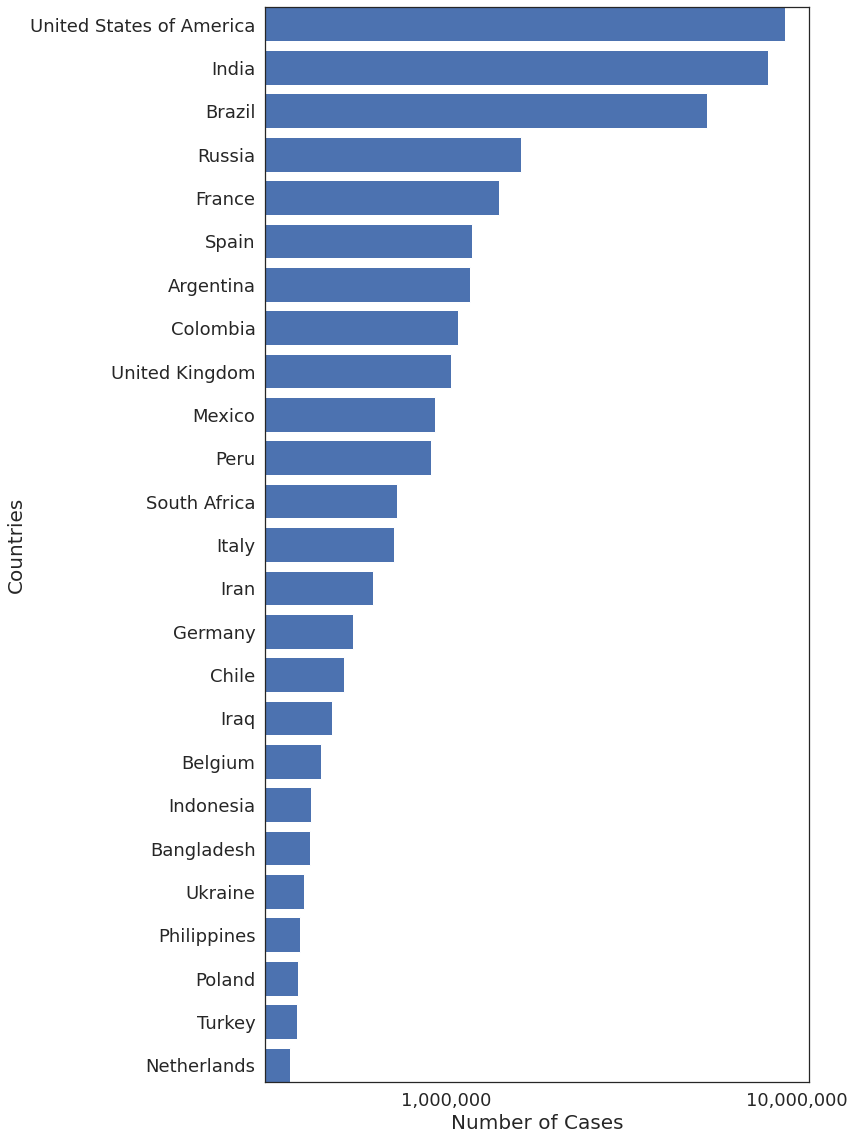

In [12]:
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16))
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list[::-1], df_top_countries['Total Cases'].values[::-1]) # Reversing the order to have heighest values at the top of bar chart
#plt.title(f'Top {len(top_countries)} Countries with Most Cases')
plt.xscale('log')
ax = plt.axes() # for updating axes values to plain text
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(y=0)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Number of Cases', fontsize=20)
plt.ylabel('Countries',fontsize=20)
plt.tight_layout()
plt.savefig(f'{bar_plot_path}/top_selected_country_cases.pdf')
plt.show()

In [13]:
"""
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16), dpi=90)

#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list, df_top_countries['Total Cases'].values)

#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')
plt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')

plt.title(f'Top {len(top_countries)} Countries with Most Cases')

plt.xscale('log')
ax = plt.axes() # for updating 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text 
#plt.xticks(rotation=90)
plt.margins(y=0)
plt.xlabel('Number of Cases')
plt.ylabel('Countries')
plt.show()
"""

"\n# Plotting graph\nsns.set_theme(style='white')\nplt.figure(figsize=(12,16), dpi=90)\n\n#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)\ntop_countries_list = format_names(df_top_countries.index)\nplt.barh(top_countries_list, df_top_countries['Total Cases'].values)\n\n#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')\nplt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')\n\nplt.title(f'Top {len(top_countries)} Countries with Most Cases')\n\nplt.xscale('log')\nax = plt.axes() # for updating \nax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))\n\n#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text \n#plt.xticks(rotation=90)\nplt.margins(y=0)\nplt.xlabel('Number of Cases')\nplt.ylabel('Countries')\nplt.show()\n"

## Average cases of top selected countries

In [14]:
dict_countries_avg = Counter(total_countries)

for country in dict_countries.keys():
  dict_countries_avg[country] = df_grouped.get_group(country)['cases'].mean()

# Average cases for all countries
df_avg_cases_countries = pd.DataFrame.from_dict(dict_countries_avg, orient='index', columns=['Average'])

# List of top selected countries
top_countries = list(df_top_countries.index)

# Average of selected top countries
avg_df = df_avg_cases_countries[df_avg_cases_countries.index.isin(top_countries)]
avg_df

,Average
Argentina,4869.378
Bangladesh,1756.446
Belgium,1431.568
Brazil,18005.536
Chile,2106.436
Colombia,4570.975
France,4590.633
Germany,1769.568
India,26805.580
Indonesia,1371.375


# Common Methods for All Experiments

## Common Methods

In [15]:
# Global variables for countries
countries = top_countries[0:Number_of_countries]

In [16]:
# Return a combined dataframe for a each error statistics(MAE,RMSE,MAPE etc) along with the newly added mean row.
def get_metric_with_mean(result: pd.DataFrame, error_metric: str)->pd.DataFrame:
  df_grouped = result.groupby('EvaluationMeasurement')
  df = df_grouped.get_group(error_metric).reset_index(drop=True)
  df = df.append(df.describe().loc['mean'])
  return df

In [17]:
def calc_mean_to_max_error(df, max_of_pretrain_days, max_of_df):
  i=-1
  for row_num in range(len(df)-1):  # Go before mean row
    i += 1
    for col_num in df.columns[2:]:
      df.loc[row_num,col_num] = df.loc[row_num,col_num]/max_of_pretrain_days[i] 
  
  for col in df.columns[2:]:
      df.loc['mean',col] = df.loc['mean',col]/max_of_df

  return df

In [18]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_runtime(df,path,country=None,static_learner=True,alternate_batch=False, transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_runtime_static.tex')
      df.to_csv(f'{path}/combined25country_runtime_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_runtime_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_runtime_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_runtime_incremental.tex')
        df.to_csv(f'{path}/combined25country_runtime_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_runtime_static.tex')
      df.to_csv(f'{path}/{country}_runtime_static.csv')
    else:
      df.to_latex(f'{path}/{country}_runtime_incremental.tex')
      df.to_csv(f'{path}/{country}_runtime_incremental.csv')

In [19]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_summary_table(df,path,country=False,static_learner=True,alternate_batch=False, transpose=False):

  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country:
    metric = df.loc['EvaluationMeasurement'].unique()[0]
    if static_learner:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_static.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_static.csv')
    else:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_incremental.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_incremental.csv')
    
  else:
    if static_learner:
      df.to_latex(f'{path}/combined25country_summary_table_static.tex')
      df.to_csv(f'{path}/combined25country_summary_table_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_summary_table_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_summary_table_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_summary_table_incremental.tex')
        df.to_csv(f'{path}/combined25country_summary_table_incremental.csv')
    

In [20]:
# Note: Do not change the filenames since they are later being used for visualizations
def save_metrics(df, path, country=None, static_learner=True, alternate_batch=False, transpose=False): 
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  metric_type = df.loc['EvaluationMeasurement'].unique()[0]
  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_{metric_type}_static.tex')
      df.to_csv(f'{path}/combined25country_{metric_type}_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_{metric_type}_incremental.tex')
        df.to_csv(f'{path}/combined25country_{metric_type}_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_{metric_type}_static.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_static.csv')
    else:
      df.to_latex(f'{path}/{country}_{metric_type}_incremental.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_incremental.csv')

In [21]:
def save_combined_summary_table(df, path, static_learner=False,transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore')
  df = df.round(decimal)
  if transpose:
    df = df.transpose()
  
  if static_learner:
    save_path = f'{path}/summary_table_combined_mean_static'
  else:
    save_path = f'{path}/summary_table_combined_mean_incremental'

  df.to_csv(f'{save_path}.csv')
  df.to_latex(f'{save_path}.tex')

In [22]:
def save_united_df(df, path, country=None):
    if country:
        df.to_csv(f'{path}/{country}.csv')
    else:
        df.to_csv(f'{path}/united_df.csv')



In [23]:
def display_runtime_per_country(results_runtime,countries):
  for i in range(len(countries)):
    print(f'_____________Running Time for {countries[i]}________________')
    print(results_runtime[i].to_string())
    print('\n')

In [24]:
def calc_save_err_metric_countrywise(countries, error_metrics, results, max_of_pretrain_per_country, max_cases_per_country, path, static_learner, transpose):
  countrywise_error_scores={}
  for i in range(len(countries)):
    country_error_score = []
    for error_metric in error_metrics:
      
      df_error_metric = get_metric_with_mean(results[i], error_metric=error_metric)

      #if error_metric != 'MAPE':
      #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_per_country[i], max_cases_per_country[i])

      country_error_score.append(df_error_metric)
      display_countrywise_scores(countries[i],df_error_metric)

      # Transposing the metrics while saving
      save_metrics(df_error_metric, path=path, country=countries[i], static_learner=static_learner, transpose=transpose)
      
    countrywise_error_scores[countries[i]] = pd.concat(country_error_score,ignore_index=True)
    
  return countrywise_error_scores

In [25]:
def calc_save_err_metric_combined(error_metrics, results, max_of_pretrain_days, max_selected_countries, path, static_learner, alternate_batch, transpose):
  combined_err_metric = []
  for error_metric in error_metrics:
    df_error_metric = get_metric_with_mean(results, error_metric=error_metric)

    #if error_metric != 'MAPE':
    #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_days, max_selected_countries)

    # Transposing the metrics while saving
    save_metrics(df_error_metric, path=path, static_learner=static_learner, alternate_batch=alternate_batch, transpose=transpose)
    
    combined_err_metric.append(df_error_metric)
  return (pd.concat(combined_err_metric, ignore_index=True))

In [26]:
def get_summary_table(df_result, df_runtime_result, error_metrics, static_learner=True):
  sum_metric=[]
  measure_col_name = 'Metric'
  
  # Setting start row and column for static and incremental learner
  for metric in error_metrics:
    start_row = 'mean'
    if static_learner:
      start_col='RandomForest'
    else:
      start_col='HT_Reg'

    df_metric = get_metric_with_mean(df_result, metric)
    df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
    
    df_row[measure_col_name] = str(metric)    
    sum_metric.append(df_row)

  # Adding run time
  df_runtime_row = pd.DataFrame([df_runtime_result.describe().loc[start_row][start_col:]])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_metric.append(df_runtime_row)

  df_summary = pd.concat(sum_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [27]:
def get_summary_table_countrywise(df_result_dict, error_metrics, static_learner=True):  #df_runtime_result,
  summary_metric=[]
  measure_col_name = f'Country({str(error_metrics[0])})'
  eval_measure_col = 'EvaluationMeasurement'
  start_row = 'mean'
  if static_learner:
    start_col='RandomForest'
  else:
    start_col='HT_Reg'

  for country in df_result_dict.keys():
    df_result = df_result_dict[country]

    # Setting start row and column for static and incremental learner
    for metric in error_metrics:      
      df_metric = get_metric_with_mean(df_result, metric)
      df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
      df_row[eval_measure_col] = metric
      df_row[measure_col_name] = country
      summary_metric.append(df_row)

  df_summary = pd.concat(summary_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [28]:
def get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime, static_learner=False):
  sum_table_combined_mean=[]
  measure_col_name = 'Metric'
  start_row = 'mean'
  if static_learner:
    start_col = 'RandomForest'
  else:
    start_col= 'HT_Reg'

  for metric in error_metrics:
    df_sum_cur_metric = get_summary_table_countrywise(countrywise_error_score_incremental, [metric], static_learner=static_learner)
    df_row = pd.DataFrame([df_sum_cur_metric.describe().loc[start_row]])

    df_row[measure_col_name] = metric
    sum_table_combined_mean.append(df_row)

  # Adding run time
  df_runtime = pd.concat(results_runtime, ignore_index=True).describe().loc[start_row][start_col:]
  df_runtime_row = pd.DataFrame([df_runtime])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_table_combined_mean.append(df_runtime_row)

  # Concating results to one dataframe
  sum_table_combined_mean = pd.concat(sum_table_combined_mean, ignore_index=True)
  sum_table_combined_mean.set_index(measure_col_name, inplace=True)
  return sum_table_combined_mean

In [29]:
def check_significance(target_pop, competitor_pop, significance_at: float):
    """
    Comparing algorithms per batch or per country pairs (exp 2 or 1 respectively), 
      so for each pair, we compare the significance of the best algo to all of the the other algos.
    Ttest performed if the distribution is normal, otherwise we perform a non-parametric test.
    """
    model_pop, population = target_pop, competitor_pop  
    
    # Normality tests
    if len(model_pop) >= 8:  # skew test not valid for smaller populations
      value_mdl, p_mdl = normaltest(model_pop.values)
      value_pop, p_pop = normaltest(population.values)
      if (p_mdl >= 0.05) & (p_pop >= 0.05):
          # print('It is likely that both populations are normal. Thus, running T-Test...')
          tset, pval = stats.ttest_ind(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Ttest)'
          else:
              significant = 'Not Significant (Ttest)'
      else:
          # print('It is unlikely that the result is normal. Thus, running Wilcoxon test...')
          if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
              tset, pval = stats.wilcoxon(model_pop, population)
              if pval < significance_at:    # alpha value is 0.05 or 5%
                  significant = 'Significant (Wilcox Test)'
              else:
                  significant = 'Not Significant (Wilcox Test)'
          else:
              # print('Warning: results are identical')
              tset, pval = stats.ttest_ind(model_pop, population)
              significant = 'Not Significant (Wilcox Test)'
    else:
      print('Population too small.')
      if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
          tset, pval = stats.wilcoxon(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Wilcox Test)'
          else:
              significant = 'Not Significant (Wilcox Test)'
    return pval, significant 

In [30]:
def unit_incremental_df(country_name, evaluator, date, milestone):  # Added Now
    frame = {}
    frame['date'] = date
    if type(country_name) == pd.Series:
        frame['Country'] = country_name
    else:
        frame['Country'] = [country_name] * len(date)
    frame['Milestone'] = [milestone] * len(date)
    frame['y_true'] = evaluator.mean_eval_measurements[0].y_true_vector
    for i in range(len(evaluator.model_names)):
        frame[f'pred_{evaluator.model_names[i]}'] = evaluator.mean_eval_measurements[i].y_pred_vector
    return pd.DataFrame(frame)



def unit_static_df(country_name, date, y_true,  milestone, model_predictions):  # Added Now
    frame = {}
    frame['date'] = date
    if type(country_name) == pd.Series:
        frame['Country'] = country_name
    else:
        frame['Country'] = [country_name] * len(date)

    frame['Milestone'] = [milestone] * len(date)
    frame['y_true'] = y_true

    for algo, y_pred in model_predictions.items():  # Updated Now
        if algo == 'LSTM':
            frame[f'pred_{algo}'] = y_pred.flatten().tolist()
        else:
            frame[f'pred_{algo}'] = y_pred

    return pd.DataFrame(frame)

## Combining Dataset

In [31]:
'''
def sortby_date_and_set_index(df):
  df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)
  return df
'''

def sortby_date_and_set_index(df):  # Updated
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    df.sort_values('date', inplace=True)
    # df.set_index('date', inplace=True) #TODO:  Not setting date as idx; Might need to remove this line later
    return df

In [32]:
def get_dataset_with_target(countries, df_grouped):
    # Empty list to store Dataframes of each country
    frames = []

    for country in countries:
        df = df_grouped.get_group(country)

        # Creating feature 'day_no'
        df['day_no'] = pd.Series([i for i in range(1, len(df) + 1)], index=df.index)

        # Reordering features
        # df = df[['day_no', 'country', 'cases']]
        df = df[['date', 'day_no', 'country', 'cases']]  # Added: Date column

        # Adding features through lags
        df = create_features_with_lags(df)

        # Creating target with last 10 days cases
        idx_cases = list(df.columns).index('cases')  # Added: Earlier hard coded idx
        df['target'] = df.iloc[:, [idx_cases] + [i * -1 for i in range(1, 10)]].mean(axis=1)  # Updated: Replacing idx with idx_cases

        # Dropping null columns
        df.dropna(how='any', axis=0, inplace=True)

        # Dropping mid columns
        drop_columns = list(df.loc[:, 'cases_t-39':'cases_t-1'].columns)  # Updated: cases_t-38 to t-39 for exact 50 columns of lags
        df.drop(drop_columns, axis=1, inplace=True)

        frames.append(df)

    return (pd.concat(frames, ignore_index=True))

In [33]:
def reshape_dataframe(*data: np.ndarray):
    # This function adds an extra dimension which is necessary in the LSTM
    arr = []
    for d in data:
        arr.append(np.reshape(np.array(d), (d.shape[0], 1, d.shape[1])))
    return arr

In [34]:
def get_countries_sortedby_cases(valid_countries, df_grouped):
  # A dictionary of all countries
  dict_countries = Counter(valid_countries)

  for country in dict_countries.keys():
    dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

  # Sorting countries based on number of cases
  countries_sortedby_cases = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True)

  # Creating dataframe 
  df_countries_sortedbycases = pd.DataFrame.from_dict(dict(countries_sortedby_cases), orient='index', columns=['Total Cases'])
  
  return df_countries_sortedbycases

In [35]:
# Getting a list of valid countries
def get_countries_with_valid_size(df):
  total_countries = list(df_grouped.groups.keys())

  # A list for countries with required datasize
  valid_countries = []

  # List of countries with more than 230 records. Because, max training size = 150, lags removed = 50, prediction = 30.
  for country in total_countries:
    if len(df_grouped.get_group(country)) >= 230:
      valid_countries.append(country)

  return valid_countries

In [36]:
def preprocess_dataset(df):  
  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df = sortby_date_and_set_index(df)

  return df

In [37]:
# Calculating maximum of dataframe for every pretrain size
def calc_max_of_pretrain_days(pretrain_days,df)->list:
  max_of_pretrain_days = []
  
  for day in pretrain_days:
    df_subset = create_subset(df,day)
    max_of_pretrain_days.append(df_subset['cases'].max())
  
  return max_of_pretrain_days

In [38]:
def display_scores(results):
  #print(f'_________________________________{country}____________________________________________')
  df_MAE = get_metric_with_mean(results,'MAE' )
  df_RMSE = get_metric_with_mean(results,'RMSE')
  df_MAPE = get_metric_with_mean(results,'MAPE')
  print('MAE Score')
  print(df_MAE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('RMSE Score')
  print(df_RMSE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('MAPE Score')
  print(df_MAPE.to_string())
  print('\n\n')

## Alternate Batch

In [39]:
def get_alternate_batch_records_idx(batch_size,total_records): 
  total_batches = total_records//batch_size
  current_batch=1
  start_idx = 0
  end_idx = batch_size
  idx_list = []
  
  while current_batch <= total_batches:
    if current_batch%2!=0:
      idx_list.extend([x for x in range(start_idx,end_idx)])
      start_idx = idx_list[-1]+(batch_size+1)
      end_idx = start_idx + batch_size
    current_batch += 1

  return idx_list

In [40]:
def create_alternate_batch_subset(df,days,batch_size):
  df_grouped = df.groupby('country')
  countries = df['country'].unique()
  frame1,frame2 = [],[]

  for country in countries:
    df_cur_country = df_grouped.get_group(country)

    df1 = df_cur_country.iloc[0:days//2]
    df2 = df_cur_country.iloc[days:days+30]  # Adding 30 for a testing batch that is one month ahead
    
    # Selecting alternate batches
    idx = get_alternate_batch_records_idx(batch_size,total_records=len(df2))
    df2 = df2.iloc[idx]

    # Appending dataframes
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Incremental Learner

In [41]:
def instantiate_regressors():
  ht_reg = HoeffdingTreeRegressor()
  hat_reg = HoeffdingAdaptiveTreeRegressor()
  arf_reg = AdaptiveRandomForestRegressor()
  pa_reg = PassiveAggressiveRegressor(max_iter=1, random_state=0, tol=1e-3)

  model = [ht_reg, hat_reg, arf_reg, pa_reg]
  model_names = ['HT_Reg', 'HAT_Reg', 'ARF_Reg', 'PA_Reg']

  return model, model_names

In [42]:
def get_error_scores_per_model(evaluator, mdl_evaluation_scores)-> pd.DataFrame:
  
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]

  return(pd.DataFrame(mdl_evaluation_scores))


In [43]:
def get_running_time_per_model_incremental_learner(evaluator,day):
    cols = ['PretrainDays']  # Adding pretrain as first column
    cols += evaluator.model_names  # Adding remaining columns of different algorithm
    running_time = []
    running_time.append(day)
    for i in range(len(evaluator.model_names)):
        running_time.append(evaluator.running_time_measurements[i]._total_time)

    return (pd.DataFrame([running_time],columns=cols))  # Passing running_time as a list of list to insert it as a row

In [44]:
def display_countrywise_scores(country,df_error_metric):
  print(f'_________________________________{country}____________________________________________')
  print(df_error_metric.to_string())
  print('\n\n')

In [45]:
# Create a dataframe of all countries with pre-train size = pretrain days and test&train size = pretrain days
def create_subset(result,days):
  result_grouped = result.groupby('country')
  countries = result['country'].unique()
  frame1,frame2 = [],[]
  for country in countries:
    df = result_grouped.get_group(country) 
    df1 = df.iloc[0:days]
    df2 = df.iloc[days:days+30]
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Static Learner

In [46]:
def mean_absolute_percentage_error(actual, predicted):
    """
    Mean absolute percentage error (MAPE).
    :return error
    """
    actual =  np.array(actual) 
    predicted = np.array(predicted) 

    mask = actual != 0
    return (np.fabs(actual - predicted) / np.fabs(actual))[mask].mean()

In [47]:
def get_scores(y_true, model_predictions, days):
    mdl_evaluation_scores = {}
    mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
    mdl_evaluation_scores['PretrainDays'] = [days] * len(mdl_evaluation_scores['EvaluationMeasurement'])

    for model in model_predictions:
        y_pred = model_predictions[model]
        if model == 'LSTM':
            rmse = mean_squared_error(y_true[:, np.newaxis], y_pred, squared=False)
            mae = mean_absolute_error(y_true[:, np.newaxis], y_pred)
            mape = mean_absolute_percentage_error(y_true[:, np.newaxis], y_pred)
        else:
            rmse = mean_squared_error(y_true, y_pred, squared=False)
            mae = mean_absolute_error(y_true, y_pred)
            mape = mean_absolute_percentage_error(y_true, y_pred)

        mdl_evaluation_scores[model] = [rmse, mae, mape]
    return pd.DataFrame(mdl_evaluation_scores)

In [48]:
def get_running_time_per_model_static_learner(model_predictions,total_execution_time):
    cols = ['PretrainDays']
    cols += model_predictions.keys()
    return pd.DataFrame(total_execution_time, columns=cols)


def measure(wrapped_func):
    @wraps(wrapped_func)
    def _time_it(*args, **kwargs):
        start = pc_timer()
        try:
            model_predictions = wrapped_func(*args, **kwargs)
        finally:
            end_ = pc_timer() - start
            return model_predictions, end_
    return _time_it


@measure
def train_test_model(regressor, X_train, y_train, X_test):
    regressor.fit(X_train, y_train)
    return regressor.predict(X_test)


@measure
def train_test_lstm(regressor, X_train_lstm, y_train, X_val_lstm, y_val, X_test_lstm, patience, epochs, batch_size_lstm):
    regressor.compile(loss='mae', optimizer='adagrad', metrics=['mse', 'mae'])

    history = regressor.fit(
        X_train_lstm,
        y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=epochs,
        batch_size=batch_size_lstm,
        callbacks=[EarlyStopping(monitor='val_loss',
                                 mode='min',
                                 patience=patience)])

    return regressor.predict(X_test_lstm)

In [49]:
def define_lstm_model(x_train_lstm, layers, activations, patience):
    # Start defining the model
    input_shape = x_train_lstm.shape

    # Definining model first with LSTM n layers
    model = Sequential()
    model.add(LSTM(layers[0], input_shape=input_shape[1:], activation=activations[0], return_sequences=True))

    # Adding middle layers
    for l in range(1, len(layers)-1):
      model.add(LSTM(layers[l], activation=activations[l], return_sequences=True))
      model.add(Dropout(0.2))

    # Add last Dense and LSTMs layers
    if len(layers) > 1:
      model.add(Dense(layers[-1], activation=activations[-1]))
      model.add(Dropout(0.2))
      model.add(LSTM(layers[-1], activation=activations[-1]))

    model.add(Dense(1))  # output layer. Since we have only 1 output value
    # End defining model

    return model


In [50]:
def normalize_dataset(*dataframes):
    arr = []
    for df in dataframes:
        arr.append(StandardScaler().fit_transform(df))
    return arr

In [51]:
def get_validation_set(df_train, batch_size=10):  # Updated Now
    '''
    lst_idx = -1
    total_batches = len(df_train) // batch_size
    train_set, val_set = [], []

    for cur_batch in range(total_batches):
        start = lst_idx + 1
        end = start + batch_size
        if cur_batch % 2 == 0:
            train_set.append(df_train.iloc[start:end])
        else:
            val_set.append(df_train.iloc[start:end])

        lst_idx = end - 1  # adjusting last index because we add 1 in starting
    '''
    train_set, val_set = [], []
    countries = df_train['country'].unique()
    for country in countries:
        train_set.append(df_train[df_train['country'] == country].iloc[:-batch_size, :])
        val_set.append(df_train[df_train['country'] == country].iloc[-batch_size:])
    return pd.concat(train_set, ignore_index=True), pd.concat(val_set, ignore_index=True)

# Experiment 1
Training and testing with five countries individually. 

### Dataset Description

* cases(t): Number of cases on current day(Column='cases') 

* cases(t-n): Number of cases 'n' days before current day 't'

* 30 day gap: Training from day number t-89 to t-39(50 days). Then a gap of 30 days and then creating target by averaging t to t-9(10 Days).


In [52]:
# Sample set for understanding dataset
sample_df = pd.read_csv(f'{csv_processed_path}/United_States_of_America.csv')
sample_df.head(5)

,date,day_no,country,cases,cases_t-89,cases_t-88,cases_t-87,cases_t-86,cases_t-85,cases_t-84,cases_t-83,cases_t-82,cases_t-81,cases_t-80,cases_t-79,cases_t-78,cases_t-77,cases_t-76,cases_t-75,cases_t-74,cases_t-73,cases_t-72,cases_t-71,cases_t-70,cases_t-69,cases_t-68,cases_t-67,cases_t-66,cases_t-65,cases_t-64,cases_t-63,cases_t-62,cases_t-61,cases_t-60,cases_t-59,cases_t-58,cases_t-57,cases_t-56,cases_t-55,cases_t-54,cases_t-53,cases_t-52,cases_t-51,cases_t-50,cases_t-49,cases_t-48,cases_t-47,cases_t-46,cases_t-45,cases_t-44,cases_t-43,cases_t-42,cases_t-41,cases_t-40,target
0,2020-03-29,90,United_States_of_America,19979,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,11525.000
1,2020-03-30,91,United_States_of_America,18360,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,12877.500
2,2020-03-31,92,United_States_of_America,21595,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,14499.600
3,2020-04-01,93,United_States_of_America,24998,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,16287.100
4,2020-04-02,94,United_States_of_America,27103,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,19.000,18151.500


## Incremental Learner

In [53]:
def reset_evaluator(evaluator):  # Added Now
  for j in range(evaluator.n_models):
      evaluator.mean_eval_measurements[j].reset()
      evaluator.current_eval_measurements[j].reset()
  return evaluator


def update_incremental_metrics(evaluator, y, prediction):  # Added Now
  for j in range(evaluator.n_models):
    for i in range(len(prediction[0])):
      evaluator.mean_eval_measurements[j].add_result(y[i], prediction[j][i])
      evaluator.current_eval_measurements[j].add_result(y[i], prediction[j][i])

    # Adding result manually causes y_true_vector to have a objects inserted like array([123.45]) in a list.
    # For calculating metrics we have to convert them into flat list.
    evaluator.mean_eval_measurements[j].y_true_vector = np.array(evaluator.mean_eval_measurements[j].y_true_vector).flatten().tolist()
    evaluator.current_eval_measurements[j].y_true_vector = np.array(evaluator.current_eval_measurements[j].y_true_vector).flatten().tolist()
  return evaluator


def get_error_scores_per_model(evaluator, mdl_evaluation_scores) -> pd.DataFrame:
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mae = mae[0]  # get_average_error() is returning a List instead of single value.  # Updated Now
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]
  return (pd.DataFrame(mdl_evaluation_scores))

In [54]:
"""
# Old

def scikit_multiflow(df, pretrain_days):

  # Creating a stream from dataframe
  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name 

  model, model_names = instantiate_regressors()

  frames, running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      pretrain_days = day
      max_samples = pretrain_days + 30  #Testing on set one month ahead only

      '''evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=max_samples)'''
      
      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day-1,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=day)


      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df

for country in countries:
  # Read each country  
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Get evaluation scores and running time for country
  evaluation_scores_df, running_time_df = scikit_multiflow(df_country,pretrain_days)

  # Appending evaluation scores and runtime for each country
  results_incremental.append(evaluation_scores_df)
  results_runtime_incremental.append(running_time_df)

  # Get max of each pretrain subset and for each country dataset
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
  max_cases_per_country.append(df_country['cases'].max())
"""

"\n# Old\n\ndef scikit_multiflow(df, pretrain_days):\n\n  # Creating a stream from dataframe\n  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name \n\n  model, model_names = instantiate_regressors()\n\n  frames, running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      pretrain_days = day\n      max_samples = pretrain_days + 30  #Testing on set one month ahead only\n\n      '''evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=day,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], \n                                    max_samples=max_samples)'''\n      \n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=day-1,\n                                    metrics = ['mean_square_

In [55]:
def scikit_multiflow(df, pretrain_days, country):  # Added Country in parameter
    # Creating a stream from dataframe
    stream = DataStream(np.array(df.iloc[:, 4:-1]), y=np.array(df.iloc[:, -1]))  # Selecting features x=[t-89:t-39] and y=[target].

    model, model_names = instantiate_regressors()

    frames, running_time_frames = [], []

    united_dataframe = []  # Added Now

    # Setup the evaluator
    for day in pretrain_days:
        pretrain_days = day
        # max_samples = pretrain_days + 30  # Training and then testing on set one month ahead only
        max_samples = pretrain_days + 1
        testing_samples_size = 30

        evaluator = EvaluatePrequential(show_plot=False,
                                        pretrain_size=pretrain_days,
                                        metrics=['mean_square_error', 'mean_absolute_error',
                                                 'mean_absolute_percentage_error'],
                                        max_samples=max_samples)

        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        X = stream.X[pretrain_days: pretrain_days + testing_samples_size]
        y = stream.y[pretrain_days: pretrain_days + testing_samples_size]
        target_dates = df.iloc[pretrain_days: pretrain_days +testing_samples_size, 0]  # Added Now

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)

        evaluator = update_incremental_metrics(evaluator, y, prediction)

        united_dataframe.append(unit_incremental_df(country, evaluator, target_dates, pretrain_days))  # Added now

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
        mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)

    united_dataframe = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    return evaluation_scores_df, running_time_df, united_dataframe  # Added united_dataframe in return statement


In [56]:
# Training all countries
results_incremental = []
results_runtime_incremental = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
    # Read each country
    df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

    # Get evaluation scores and running time for country
    evaluation_scores_df, running_time_df, united_dataframe = scikit_multiflow(df_country,pretrain_days, country)

    save_united_df(united_dataframe, exp1_inc_united_df_path, country=country)

    # Appending evaluation scores and runtime for each country
    results_incremental.append(evaluation_scores_df)

    results_runtime_incremental.append(running_time_df)

    # Get max of each pretrain subset and for each country dataset
    max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
    max_cases_per_country.append(df_country['cases'].max())



Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 30 sample(s).
Evaluating...
 ###################- [97%] [0.58s]
Processed samples: 31
Mean performance:
HT_Reg - MSE          : 25886739.3543
HT_Reg - MAPE          : 0.1777
HT_Reg - MAE          : 5087.901272
HAT_Reg - MSE          : 5809772.9480
HAT_Reg - MAPE          : 0.0842
HAT_Reg - MAE          : 2410.347060
ARF_Reg - MSE          : 237858037.1017
ARF_Reg - MAPE          : 0.5387
ARF_Reg - MAE          : 15422.646890
PA_Reg - MSE          : 116920245843.2590
PA_Reg - MAPE          : 11.9438
PA_Reg - MAE          : 341936.025951
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 60 sample(s).
Evaluating...
 #################### [98%] [1.16s]
Processed samples: 61
Mean performance:
HT_Reg - MSE          : 1214844588.6893
HT_Reg - MAPE          : 1.6350
HT_Reg - MAE          : 34854.620765
HAT_Reg - MSE          : 1215921851.7309
HAT_Reg - MAPE          : 1.6357
HAT_Reg - MAE          : 34870.071003
ARF_Reg

In [57]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_incremental[i], path=exp1_runtime_path, country = countries[i], static_learner=False)

# Display countrywise running time complexity
display_runtime_per_country(results_runtime_incremental, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.011    0.016    0.568   0.003
1            60   0.024    0.039    1.114   0.002


_____________Running Time for India________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.011    0.016    0.518   0.002
1            60   0.029    0.039    1.127   0.002


_____________Running Time for Brazil________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.010    0.016    0.474   0.002
1            60   0.023    0.036    1.161   0.002


_____________Running Time for Russia________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.010    0.015    0.499   0.002
1            60   0.022    0.036    1.115   0.002


_____________Running Time for France________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.011    0.018    0.521   0.002
1         

In [58]:
countrywise_error_score_incremental = calc_save_err_metric_countrywise(countries, error_metrics, results_incremental, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=False, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays      HT_Reg     HAT_Reg     ARF_Reg      PA_Reg
0                      MAE        30.000   63866.316  434880.361 1577588.283 1819162.372
1                      MAE        60.000 1466292.259 1486478.005 1448160.104 5818965.043
mean                   NaN        45.000  765079.288  960679.183 1512874.194 3819063.707



_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0                     MAPE        30.000   2.774   19.174   69.279  79.974
1                     MAPE        60.000  58.891   59.714   58.334 249.268
mean                   NaN        45.000  30.833   39.444   63.807 164.621



_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  Pret

In [59]:
# Get summary table for each country for specified metric
summary_table_countrywise_incremental = get_summary_table_countrywise(countrywise_error_score_incremental, ['MAPE'], static_learner=False)

# Saving the summary table
save_summary_table(summary_table_countrywise_incremental, exp1_summary_path,country=True, static_learner=False,alternate_batch=False,transpose=True)

summary_table_countrywise_incremental

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg,EvaluationMeasurement
Country(MAPE),,,,,
United_States_of_America,30.833,39.444,63.807,164.621,MAPE
India,1.673,1.576,4.009,5.365,MAPE
Brazil,3.195,8.094,12.163,2.154,MAPE
Russia,9.946,17.471,20.455,62.988,MAPE
France,51.496,62.674,30.867,555.604,MAPE
Spain,575.575,1053.408,478.019,358.662,MAPE
Argentina,0.263,0.264,0.276,0.558,MAPE
Colombia,0.383,0.382,0.366,0.341,MAPE
United_Kingdom,14.279,36.448,63.151,113.682,MAPE


In [60]:
sum_inc_countrywise_mean = get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime_incremental)
save_combined_summary_table(sum_inc_countrywise_mean, exp1_summary_path, static_learner=False, transpose=True) 
sum_inc_countrywise_mean

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
Metric,,,,
MAE,55365.420,84023.922,100201.482,223897.371
MAPE,39.966,66.223,43.811,90.982
RMSE,81500.610,129027.309,144408.182,272240.630
Time(sec),0.021,0.031,0.772,0.002


## Static Learner

In [61]:
def scikit_learn(df, training_days, country):  #Added country now
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': [] 
      # 'MLPRegressor': [],
      # 'LinearRegression': []
    }
    total_execution_time = []

    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 10  #TODO: Update to: 500
    patience = 20
    batch_size_lstm = 10
    united_dataframe = []  # Added Now

    for day in training_days:
        testing_samples_size = 30  # Added Now
        cur_exec_time = [day]  # Keeping running time for each pre-train set
        target_dates = df.iloc[day: day + testing_samples_size, 0]  # Added Now
        train = df.iloc[:day, :]
        test = df.iloc[day:day + testing_samples_size, :]  # Testing on set one month ahead only, hence day+30.

        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        united_dataframe.append(unit_static_df(country, target_dates, y_test, day, model_predictions))  # Added now

        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    united_dataframe = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    running_time_df = get_running_time_per_model_static_learner(model_predictions, total_execution_time)
    return evaluation_score_df, running_time_df, united_dataframe


In [62]:
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
    # Read country wise csv file
    df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

    # Evaluation scores and running time of each algorithm over different pre-training days
    evaluation_scores_df, running_time_df, united_dataframe = scikit_learn(df_country, pretrain_days, country)  # Returning united_dataframe also

    save_united_df(united_dataframe, exp1_static_united_df_path, country=country)

    # Append result of each pretrain size in results
    results_static.append(evaluation_scores_df)

    # Appending every country runtime
    results_runtime_static.append(running_time_df)

    # Calculating max cases per country based on pre-train size
    max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days, df_country))

    # Maximum case of each country
    max_cases_per_country.append(df_country['cases'].max())

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 89ms/step - loss: 24611.8643 - mse: 649051776.0000 - mae: 24611.8652 - val_loss: 29278.5371 - val_mse: 857781120.0000 - val_mae: 29278.5371
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 24611.8359 - mse: 649050240.0000 - mae: 24611.8340 - val_loss: 29278.5098 - val_mse: 857779456.0000 - val_mae: 29278.5098
Epoch 3/10
20/20 [==============================] - 0s 965us/step - loss: 24611.8037 - mse: 649048704.0000 - mae: 24611.8027 - val_loss: 29278.4785 - val_mse: 857777792.0000 - val_mae: 29278.4785
Epoch 4/10
20/20 [==============================] - 0s 984us/step - loss: 24611.7754 - mse: 649047360.0000 - mae: 24611.7754 - val_loss: 29278.4434 - val_mse: 857775744.0000 - val_mae: 29278.4434
Epoch 5/10
20/20 [==============================] - 0s 975us/step - loss: 24611.7314 - mse: 649045312.0000 - mae: 24611.7305 - val_loss: 29278.3906 - val_mse: 857772672.0000 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 35ms/step - loss: 26302.4703 - mse: 713714496.0000 - mae: 26302.4707 - val_loss: 22458.7344 - val_mse: 504742816.0000 - val_mae: 22458.7344
Epoch 2/10
50/50 [==============================] - 0s 643us/step - loss: 26302.2891 - mse: 713705216.0000 - mae: 26302.2852 - val_loss: 22458.2539 - val_mse: 504721312.0000 - val_mae: 22458.2539
Epoch 3/10
50/50 [==============================] - 0s 587us/step - loss: 26300.8531 - mse: 713626496.0000 - mae: 26300.8516 - val_loss: 22455.6602 - val_mse: 504604608.0000 - val_mae: 22455.6602
Epoch 4/10
50/50 [==============================] - 0s 602us/step - loss: 26295.4969 - mse: 713345024.0000 - mae: 26295.4941 - val_loss: 22449.4375 - val_mse: 504324928.0000 - val_mae: 22449.4375
Epoch 5/10
50/50 [==============================] - 0s 595us/step - loss: 26287.6293 - mse: 712935616.0000 - mae: 26287.6309 - val_loss: 22442.9219 - val_mse: 504031808.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 95ms/step - loss: 467.9253 - mse: 295144.7812 - mae: 467.9253 - val_loss: 1253.0929 - val_mse: 1595485.0000 - val_mae: 1253.0929
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 467.8911 - mse: 295112.8125 - mae: 467.8911 - val_loss: 1253.0619 - val_mse: 1595407.6250 - val_mae: 1253.0619
Epoch 3/10
20/20 [==============================] - 0s 949us/step - loss: 467.8603 - mse: 295083.9688 - mae: 467.8603 - val_loss: 1253.0300 - val_mse: 1595328.1250 - val_mae: 1253.0300
Epoch 4/10
20/20 [==============================] - 0s 901us/step - loss: 467.8206 - mse: 295048.2188 - mae: 467.8206 - val_loss: 1252.9917 - val_mse: 1595231.8750 - val_mae: 1252.9917
Epoch 5/10
20/20 [==============================] - 0s 877us/step - loss: 467.7821 - mse: 295009.5625 - mae: 467.7820 - val_loss: 1252.9460 - val_mse: 1595117.5000 - val_mae: 1252.9460
Epoch 6/10
20/20 [================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 34ms/step - loss: 1524.6531 - mse: 3647314.5000 - mae: 1524.6530 - val_loss: 5221.8433 - val_mse: 27775124.0000 - val_mae: 5221.8433
Epoch 2/10
50/50 [==============================] - 0s 649us/step - loss: 1524.5984 - mse: 3647158.5000 - mae: 1524.5984 - val_loss: 5221.7617 - val_mse: 27774330.0000 - val_mae: 5221.7617
Epoch 3/10
50/50 [==============================] - 0s 563us/step - loss: 1524.3388 - mse: 3646653.5000 - mae: 1524.3387 - val_loss: 5220.7944 - val_mse: 27765594.0000 - val_mae: 5220.7944
Epoch 4/10
50/50 [==============================] - 0s 540us/step - loss: 1521.1365 - mse: 3641353.5000 - mae: 1521.1366 - val_loss: 5216.5410 - val_mse: 27726784.0000 - val_mae: 5216.5410
Epoch 5/10
50/50 [==============================] - 0s 522us/step - loss: 1516.7128 - mse: 3633814.5000 - mae: 1516.7128 - val_loss: 5212.5146 - val_mse: 27689766.0000 - val_mae: 5212.5146
Epoch 6/10
5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 99ms/step - loss: 999.9317 - mse: 1218815.0000 - mae: 999.9316 - val_loss: 2437.6089 - val_mse: 6102555.5000 - val_mae: 2437.6089
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 999.9032 - mse: 1218755.6250 - mae: 999.9031 - val_loss: 2437.5842 - val_mse: 6102436.0000 - val_mae: 2437.5842
Epoch 3/10
20/20 [==============================] - 0s 905us/step - loss: 999.8782 - mse: 1218705.7500 - mae: 999.8782 - val_loss: 2437.5591 - val_mse: 6102314.5000 - val_mae: 2437.5591
Epoch 4/10
20/20 [==============================] - 0s 721us/step - loss: 999.8516 - mse: 1218658.0000 - mae: 999.8516 - val_loss: 2437.5266 - val_mse: 6102163.0000 - val_mae: 2437.5266
Epoch 5/10
20/20 [==============================] - 0s 908us/step - loss: 999.8203 - mse: 1218602.0000 - mae: 999.8203 - val_loss: 2437.4763 - val_mse: 6101935.5000 - val_mae: 2437.4763
Epoch 6/10
20/20 [===========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 35ms/step - loss: 3541.4968 - mse: 21182426.0000 - mae: 3541.4968 - val_loss: 13879.5596 - val_mse: 197004064.0000 - val_mae: 13879.5596
Epoch 2/10
50/50 [==============================] - 0s 676us/step - loss: 3541.3560 - mse: 21181724.0000 - mae: 3541.3562 - val_loss: 13879.0986 - val_mse: 196993232.0000 - val_mae: 13879.0986
Epoch 3/10
50/50 [==============================] - 0s 590us/step - loss: 3539.1260 - mse: 21171270.0000 - mae: 3539.1260 - val_loss: 13874.9971 - val_mse: 196895360.0000 - val_mae: 13874.9971
Epoch 4/10
50/50 [==============================] - 0s 596us/step - loss: 3531.6004 - mse: 21143782.0000 - mae: 3531.6006 - val_loss: 13868.5469 - val_mse: 196739296.0000 - val_mae: 13868.5469
Epoch 5/10
50/50 [==============================] - 0s 618us/step - loss: 3520.4866 - mse: 21093732.0000 - mae: 3520.4863 - val_loss: 13861.0576 - val_mse: 196557008.0000 - val_mae: 138

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 101ms/step - loss: 773.4420 - mse: 960354.3750 - mae: 773.4420 - val_loss: 3970.3665 - val_mse: 16573128.0000 - val_mae: 3970.3665
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 773.4099 - mse: 960309.1250 - mae: 773.4099 - val_loss: 3970.3391 - val_mse: 16572912.0000 - val_mae: 3970.3391
Epoch 3/10
20/20 [==============================] - 0s 937us/step - loss: 773.3840 - mse: 960267.8125 - mae: 773.3840 - val_loss: 3970.3140 - val_mse: 16572714.0000 - val_mae: 3970.3140
Epoch 4/10
20/20 [==============================] - 0s 957us/step - loss: 773.3593 - mse: 960230.8750 - mae: 773.3593 - val_loss: 3970.2891 - val_mse: 16572518.0000 - val_mae: 3970.2891
Epoch 5/10
20/20 [==============================] - 0s 898us/step - loss: 773.3315 - mse: 960182.3750 - mae: 773.3315 - val_loss: 3970.2625 - val_mse: 16572310.0000 - val_mae: 3970.2625
Epoch 6/10
20/20 [==========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 36ms/step - loss: 4503.2384 - mse: 34180336.0000 - mae: 4503.2383 - val_loss: 9648.3125 - val_mse: 93329712.0000 - val_mae: 9648.3125
Epoch 2/10
50/50 [==============================] - 0s 706us/step - loss: 4503.1641 - mse: 34179728.0000 - mae: 4503.1636 - val_loss: 9648.1152 - val_mse: 93325752.0000 - val_mae: 9648.1152
Epoch 3/10
50/50 [==============================] - 0s 553us/step - loss: 4502.5735 - mse: 34176964.0000 - mae: 4502.5732 - val_loss: 9645.8916 - val_mse: 93280912.0000 - val_mae: 9645.8916
Epoch 4/10
50/50 [==============================] - 0s 626us/step - loss: 4497.7577 - mse: 34149000.0000 - mae: 4497.7573 - val_loss: 9640.2705 - val_mse: 93168048.0000 - val_mae: 9640.2705
Epoch 5/10
50/50 [==============================] - 0s 565us/step - loss: 4490.1852 - mse: 34106540.0000 - mae: 4490.1855 - val_loss: 9634.5361 - val_mse: 93053376.0000 - val_mae: 9634.5361
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 102ms/step - loss: 3751.9486 - mse: 14259862.0000 - mae: 3751.9485 - val_loss: 2337.5667 - val_mse: 5681409.5000 - val_mae: 2337.5667
Epoch 2/10
20/20 [==============================] - 0s 908us/step - loss: 3751.9082 - mse: 14259558.0000 - mae: 3751.9082 - val_loss: 2337.5293 - val_mse: 5681235.0000 - val_mae: 2337.5293
Epoch 3/10
20/20 [==============================] - 0s 944us/step - loss: 3751.8700 - mse: 14259272.0000 - mae: 3751.8699 - val_loss: 2337.4902 - val_mse: 5681051.0000 - val_mae: 2337.4902
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 3751.8282 - mse: 14258970.0000 - mae: 3751.8281 - val_loss: 2337.4441 - val_mse: 5680836.5000 - val_mae: 2337.4441
Epoch 5/10
20/20 [==============================] - 0s 927us/step - loss: 3751.7881 - mse: 14258661.0000 - mae: 3751.7883 - val_loss: 2337.3882 - val_mse: 5680573.5000 - val_mae: 2337.3882
Epoch 6/10
20

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 36ms/step - loss: 2414.8262 - mse: 7369102.0000 - mae: 2414.8262 - val_loss: 417.0234 - val_mse: 176860.5781 - val_mae: 417.0234
Epoch 2/10
50/50 [==============================] - 0s 659us/step - loss: 2414.6143 - mse: 7367894.0000 - mae: 2414.6143 - val_loss: 416.5682 - val_mse: 176450.3281 - val_mae: 416.5682
Epoch 3/10
50/50 [==============================] - 0s 603us/step - loss: 2412.4513 - mse: 7355737.5000 - mae: 2412.4514 - val_loss: 412.8914 - val_mse: 173110.7031 - val_mae: 412.8914
Epoch 4/10
50/50 [==============================] - 0s 578us/step - loss: 2405.8946 - mse: 7314974.0000 - mae: 2405.8945 - val_loss: 405.5638 - val_mse: 166590.7500 - val_mae: 405.5638
Epoch 5/10
50/50 [==============================] - 0s 564us/step - loss: 2390.1420 - mse: 7224399.5000 - mae: 2390.1418 - val_loss: 393.3763 - val_mse: 156191.5938 - val_mae: 393.3763
Epoch 6/10
50/50 [==============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 104ms/step - loss: 6186.8779 - mse: 39701668.0000 - mae: 6186.8779 - val_loss: 2935.1050 - val_mse: 8889990.0000 - val_mae: 2935.1050
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 6186.8552 - mse: 39701384.0000 - mae: 6186.8555 - val_loss: 2935.0864 - val_mse: 8889881.0000 - val_mae: 2935.0864
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 6186.8364 - mse: 39701144.0000 - mae: 6186.8364 - val_loss: 2935.0676 - val_mse: 8889766.0000 - val_mae: 2935.0676
Epoch 4/10
20/20 [==============================] - 0s 940us/step - loss: 6186.8147 - mse: 39700876.0000 - mae: 6186.8149 - val_loss: 2935.0425 - val_mse: 8889608.0000 - val_mae: 2935.0425
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 6186.7771 - mse: 39700384.0000 - mae: 6186.7769 - val_loss: 2934.9878 - val_mse: 8889247.0000 - val_mae: 2934.9878
Epoch 6/10
20/20 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 35ms/step - loss: 3581.8255 - mse: 18390434.0000 - mae: 3581.8257 - val_loss: 625.0194 - val_mse: 403127.4375 - val_mae: 625.0194
Epoch 2/10
50/50 [==============================] - 0s 636us/step - loss: 3581.6483 - mse: 18388682.0000 - mae: 3581.6487 - val_loss: 624.7522 - val_mse: 402758.4375 - val_mae: 624.7522
Epoch 3/10
50/50 [==============================] - 0s 544us/step - loss: 3579.1036 - mse: 18364890.0000 - mae: 3579.1038 - val_loss: 621.3160 - val_mse: 398061.5000 - val_mae: 621.3160
Epoch 4/10
50/50 [==============================] - 0s 586us/step - loss: 3571.5327 - mse: 18286900.0000 - mae: 3571.5325 - val_loss: 615.0817 - val_mse: 389880.3125 - val_mae: 615.0817
Epoch 5/10
50/50 [==============================] - 0s 516us/step - loss: 3561.9837 - mse: 18209154.0000 - mae: 3561.9836 - val_loss: 607.5370 - val_mse: 380223.9375 - val_mae: 607.5370
Epoch 6/10
50/50 [=========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 83ms/step - loss: 1088.1179 - mse: 1266451.0000 - mae: 1088.1179 - val_loss: 2107.0740 - val_mse: 4535563.0000 - val_mae: 2107.0740
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 1088.0939 - mse: 1266399.2500 - mae: 1088.0940 - val_loss: 2107.0552 - val_mse: 4535484.5000 - val_mae: 2107.0552
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 1088.0757 - mse: 1266360.3750 - mae: 1088.0756 - val_loss: 2107.0371 - val_mse: 4535409.0000 - val_mae: 2107.0371
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 1088.0565 - mse: 1266318.6250 - mae: 1088.0564 - val_loss: 2107.0176 - val_mse: 4535327.0000 - val_mae: 2107.0176
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 1088.0311 - mse: 1266264.2500 - mae: 1088.0310 - val_loss: 2106.9946 - val_mse: 4535231.0000 - val_mae: 2106.9946
Epoch 6/10
20/20 [=======

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 42ms/step - loss: 2041.9003 - mse: 5028414.5000 - mae: 2041.9003 - val_loss: 4931.7563 - val_mse: 24489092.0000 - val_mae: 4931.7563
Epoch 2/10
50/50 [==============================] - 0s 628us/step - loss: 2041.6981 - mse: 5027798.0000 - mae: 2041.6980 - val_loss: 4931.4565 - val_mse: 24486324.0000 - val_mae: 4931.4565
Epoch 3/10
50/50 [==============================] - 0s 722us/step - loss: 2040.0534 - mse: 5023835.5000 - mae: 2040.0535 - val_loss: 4929.0249 - val_mse: 24464218.0000 - val_mae: 4929.0249
Epoch 4/10
50/50 [==============================] - 0s 556us/step - loss: 2034.8087 - mse: 5009113.0000 - mae: 2034.8090 - val_loss: 4922.8623 - val_mse: 24407728.0000 - val_mae: 4922.8623
Epoch 5/10
50/50 [==============================] - 0s 645us/step - loss: 2023.5633 - mse: 4975318.5000 - mae: 2023.5631 - val_loss: 4913.1465 - val_mse: 24318318.0000 - val_mae: 4913.1465
Epoch 6/10
5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 87ms/step - loss: 1932.9835 - mse: 4001024.0000 - mae: 1932.9836 - val_loss: 3399.1743 - val_mse: 11594461.0000 - val_mae: 3399.1743
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 1932.9594 - mse: 4000932.0000 - mae: 1932.9594 - val_loss: 3399.1548 - val_mse: 11594328.0000 - val_mae: 3399.1548
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 1932.9399 - mse: 4000859.2500 - mae: 1932.9398 - val_loss: 3399.1372 - val_mse: 11594209.0000 - val_mae: 3399.1372
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 1932.9213 - mse: 4000788.0000 - mae: 1932.9213 - val_loss: 3399.1187 - val_mse: 11594085.0000 - val_mae: 3399.1187
Epoch 5/10
20/20 [==============================] - 0s 967us/step - loss: 1932.9018 - mse: 4000708.0000 - mae: 1932.9017 - val_loss: 3399.0972 - val_mse: 11593936.0000 - val_mae: 3399.0972
Epoch 6/10
20/20 [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 39ms/step - loss: 3676.2486 - mse: 16985082.0000 - mae: 3676.2488 - val_loss: 8611.6279 - val_mse: 74721296.0000 - val_mae: 8611.6279
Epoch 2/10
50/50 [==============================] - 0s 640us/step - loss: 3676.0277 - mse: 16983930.0000 - mae: 3676.0276 - val_loss: 8611.1797 - val_mse: 74714192.0000 - val_mae: 8611.1797
Epoch 3/10
50/50 [==============================] - 0s 770us/step - loss: 3674.7024 - mse: 16977074.0000 - mae: 3674.7024 - val_loss: 8608.8535 - val_mse: 74677424.0000 - val_mae: 8608.8535
Epoch 4/10
50/50 [==============================] - 0s 587us/step - loss: 3670.3984 - mse: 16954640.0000 - mae: 3670.3984 - val_loss: 8604.1680 - val_mse: 74602048.0000 - val_mae: 8604.1680
Epoch 5/10
50/50 [==============================] - 0s 573us/step - loss: 3662.8730 - mse: 16912186.0000 - mae: 3662.8730 - val_loss: 8596.8232 - val_mse: 74480896.0000 - val_mae: 8596.8232
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 85ms/step - loss: 3795.5518 - mse: 15226278.0000 - mae: 3795.5515 - val_loss: 4620.9980 - val_mse: 21384788.0000 - val_mae: 4620.9980
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 3795.5205 - mse: 15226046.0000 - mae: 3795.5203 - val_loss: 4620.9712 - val_mse: 21384540.0000 - val_mae: 4620.9712
Epoch 3/10
20/20 [==============================] - 0s 853us/step - loss: 3795.4933 - mse: 15225840.0000 - mae: 3795.4934 - val_loss: 4620.9424 - val_mse: 21384272.0000 - val_mae: 4620.9424
Epoch 4/10
20/20 [==============================] - 0s 848us/step - loss: 3795.4581 - mse: 15225568.0000 - mae: 3795.4583 - val_loss: 4620.9038 - val_mse: 21383924.0000 - val_mae: 4620.9038
Epoch 5/10
20/20 [==============================] - 0s 808us/step - loss: 3795.4089 - mse: 15225213.0000 - mae: 3795.4089 - val_loss: 4620.8408 - val_mse: 21383348.0000 - val_mae: 4620.8408
Epoch 6/1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 41ms/step - loss: 4042.4461 - mse: 16909900.0000 - mae: 4042.4460 - val_loss: 2566.8140 - val_mse: 6642386.5000 - val_mae: 2566.8140
Epoch 2/10
50/50 [==============================] - 0s 719us/step - loss: 4042.0299 - mse: 16906640.0000 - mae: 4042.0300 - val_loss: 2565.8784 - val_mse: 6637285.5000 - val_mae: 2565.8784
Epoch 3/10
50/50 [==============================] - 0s 577us/step - loss: 4039.2426 - mse: 16883348.0000 - mae: 4039.2424 - val_loss: 2561.7092 - val_mse: 6614535.0000 - val_mae: 2561.7092
Epoch 4/10
50/50 [==============================] - 0s 552us/step - loss: 4030.9001 - mse: 16814952.0000 - mae: 4030.8999 - val_loss: 2553.1633 - val_mse: 6568069.0000 - val_mae: 2553.1633
Epoch 5/10
50/50 [==============================] - 0s 745us/step - loss: 4016.4996 - mse: 16696614.0000 - mae: 4016.4998 - val_loss: 2538.6929 - val_mse: 6490000.0000 - val_mae: 2538.6929
Epoch 6/10
5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 85ms/step - loss: 616.4636 - mse: 452224.9375 - mae: 616.4636 - val_loss: 1384.7650 - val_mse: 1936825.3750 - val_mae: 1384.7650
Epoch 2/10
20/20 [==============================] - 0s 978us/step - loss: 616.4205 - mse: 452170.3125 - mae: 616.4205 - val_loss: 1384.7260 - val_mse: 1936717.3750 - val_mae: 1384.7260
Epoch 3/10
20/20 [==============================] - 0s 900us/step - loss: 616.3784 - mse: 452119.6875 - mae: 616.3785 - val_loss: 1384.6842 - val_mse: 1936601.2500 - val_mae: 1384.6842
Epoch 4/10
20/20 [==============================] - 0s 872us/step - loss: 616.3327 - mse: 452062.5938 - mae: 616.3327 - val_loss: 1384.6350 - val_mse: 1936465.6250 - val_mae: 1384.6350
Epoch 5/10
20/20 [==============================] - 0s 897us/step - loss: 616.2731 - mse: 451985.4062 - mae: 616.2731 - val_loss: 1384.5699 - val_mse: 1936287.6250 - val_mae: 1384.5699
Epoch 6/10
20/20 [==============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 40ms/step - loss: 1495.5334 - mse: 3036894.5000 - mae: 1495.5333 - val_loss: 3652.5073 - val_mse: 13403674.0000 - val_mae: 3652.5073
Epoch 2/10
50/50 [==============================] - 0s 571us/step - loss: 1495.4864 - mse: 3036756.2500 - mae: 1495.4865 - val_loss: 3652.4585 - val_mse: 13403318.0000 - val_mae: 3652.4585
Epoch 3/10
50/50 [==============================] - 0s 600us/step - loss: 1495.3878 - mse: 3036484.5000 - mae: 1495.3878 - val_loss: 3652.2734 - val_mse: 13402002.0000 - val_mae: 3652.2734
Epoch 4/10
50/50 [==============================] - 0s 609us/step - loss: 1494.9200 - mse: 3035564.7500 - mae: 1494.9200 - val_loss: 3651.3411 - val_mse: 13395417.0000 - val_mae: 3651.3411
Epoch 5/10
50/50 [==============================] - 0s 598us/step - loss: 1492.9316 - mse: 3030959.2500 - mae: 1492.9315 - val_loss: 3648.8184 - val_mse: 13377528.0000 - val_mae: 3648.8184
Epoch 6/10
5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 88ms/step - loss: 4681.4255 - mse: 22331500.0000 - mae: 4681.4253 - val_loss: 3495.9246 - val_mse: 12229926.0000 - val_mae: 3495.9246
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 4681.3896 - mse: 22331166.0000 - mae: 4681.3896 - val_loss: 3495.8914 - val_mse: 12229694.0000 - val_mae: 3495.8914
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 4681.3545 - mse: 22330828.0000 - mae: 4681.3545 - val_loss: 3495.8516 - val_mse: 12229415.0000 - val_mae: 3495.8516
Epoch 4/10
20/20 [==============================] - 0s 989us/step - loss: 4681.3008 - mse: 22330308.0000 - mae: 4681.3008 - val_loss: 3495.7812 - val_mse: 12228922.0000 - val_mae: 3495.7812
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 4681.1787 - mse: 22329060.0000 - mae: 4681.1787 - val_loss: 3495.6262 - val_mse: 12227834.0000 - val_mae: 3495.6262
Epoch 6/10
20

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 40ms/step - loss: 4000.7301 - mse: 16503872.0000 - mae: 4000.7300 - val_loss: 4800.8271 - val_mse: 23339790.0000 - val_mae: 4800.8271
Epoch 2/10
50/50 [==============================] - 0s 628us/step - loss: 4000.6202 - mse: 16502924.0000 - mae: 4000.6204 - val_loss: 4800.7544 - val_mse: 23339110.0000 - val_mae: 4800.7544
Epoch 3/10
50/50 [==============================] - 0s 608us/step - loss: 4000.2083 - mse: 16499323.0000 - mae: 4000.2080 - val_loss: 4800.4829 - val_mse: 23336724.0000 - val_mae: 4800.4829
Epoch 4/10
50/50 [==============================] - 0s 604us/step - loss: 3998.6743 - mse: 16485695.0000 - mae: 3998.6743 - val_loss: 4799.4478 - val_mse: 23327796.0000 - val_mae: 4799.4478
Epoch 5/10
50/50 [==============================] - 0s 627us/step - loss: 3995.5547 - mse: 16458588.0000 - mae: 3995.5549 - val_loss: 4796.9229 - val_mse: 23305980.0000 - val_mae: 4796.9229
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 90ms/step - loss: 2838.9937 - mse: 8568349.0000 - mae: 2838.9937 - val_loss: 5550.8066 - val_mse: 31598886.0000 - val_mae: 5550.8066
Epoch 2/10
20/20 [==============================] - 0s 973us/step - loss: 2838.9725 - mse: 8568226.0000 - mae: 2838.9727 - val_loss: 5550.7900 - val_mse: 31598694.0000 - val_mae: 5550.7900
Epoch 3/10
20/20 [==============================] - 0s 969us/step - loss: 2838.9548 - mse: 8568123.0000 - mae: 2838.9546 - val_loss: 5550.7725 - val_mse: 31598502.0000 - val_mae: 5550.7725
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 2838.9315 - mse: 8567982.0000 - mae: 2838.9316 - val_loss: 5550.7510 - val_mse: 31598252.0000 - val_mae: 5550.7510
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 2838.9010 - mse: 8567784.0000 - mae: 2838.9009 - val_loss: 5550.7163 - val_mse: 31597830.0000 - val_mae: 5550.7163
Epoch 6/10
20/20

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 43ms/step - loss: 6485.9479 - mse: 55781308.0000 - mae: 6485.9473 - val_loss: 11303.7451 - val_mse: 128254592.0000 - val_mae: 11303.7451
Epoch 2/10
50/50 [==============================] - 0s 700us/step - loss: 6485.8861 - mse: 55780448.0000 - mae: 6485.8862 - val_loss: 11303.6533 - val_mse: 128252504.0000 - val_mae: 11303.6533
Epoch 3/10
50/50 [==============================] - 0s 626us/step - loss: 6485.5196 - mse: 55776440.0000 - mae: 6485.5200 - val_loss: 11302.8730 - val_mse: 128234320.0000 - val_mae: 11302.8730
Epoch 4/10
50/50 [==============================] - 0s 620us/step - loss: 6484.3354 - mse: 55763388.0000 - mae: 6484.3350 - val_loss: 11300.3955 - val_mse: 128177072.0000 - val_mae: 11300.3955
Epoch 5/10
50/50 [==============================] - 0s 782us/step - loss: 6479.9213 - mse: 55711980.0000 - mae: 6479.9214 - val_loss: 11295.5215 - val_mse: 128065600.0000 - val_mae: 112

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 88ms/step - loss: 4599.6619 - mse: 21579398.0000 - mae: 4599.6616 - val_loss: 3248.8801 - val_mse: 10630237.0000 - val_mae: 3248.8801
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 4599.6362 - mse: 21579164.0000 - mae: 4599.6362 - val_loss: 3248.8586 - val_mse: 10630097.0000 - val_mae: 3248.8586
Epoch 3/10
20/20 [==============================] - 0s 891us/step - loss: 4599.6147 - mse: 21578964.0000 - mae: 4599.6147 - val_loss: 3248.8359 - val_mse: 10629949.0000 - val_mae: 3248.8359
Epoch 4/10
20/20 [==============================] - 0s 974us/step - loss: 4599.5916 - mse: 21578752.0000 - mae: 4599.5913 - val_loss: 3248.8098 - val_mse: 10629774.0000 - val_mae: 3248.8098
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 4599.5671 - mse: 21578516.0000 - mae: 4599.5674 - val_loss: 3248.7729 - val_mse: 10629526.0000 - val_mae: 3248.7729
Epoch 6/10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 36ms/step - loss: 3188.4635 - mse: 12094400.0000 - mae: 3188.4639 - val_loss: 766.8401 - val_mse: 600526.6875 - val_mae: 766.8401
Epoch 2/10
50/50 [==============================] - 0s 871us/step - loss: 3188.3499 - mse: 12093548.0000 - mae: 3188.3496 - val_loss: 766.6875 - val_mse: 600266.4375 - val_mae: 766.6875
Epoch 3/10
50/50 [==============================] - 0s 697us/step - loss: 3187.4932 - mse: 12086420.0000 - mae: 3187.4932 - val_loss: 765.6060 - val_mse: 598376.6250 - val_mae: 765.6060
Epoch 4/10
50/50 [==============================] - 0s 655us/step - loss: 3183.7352 - mse: 12056845.0000 - mae: 3183.7351 - val_loss: 761.8458 - val_mse: 591894.1250 - val_mae: 761.8458
Epoch 5/10
50/50 [==============================] - 0s 725us/step - loss: 3176.5353 - mse: 12002044.0000 - mae: 3176.5354 - val_loss: 756.1388 - val_mse: 582209.8125 - val_mae: 756.1388
Epoch 6/10
50/50 [=========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 103ms/step - loss: 2357.9452 - mse: 5690966.5000 - mae: 2357.9451 - val_loss: 1460.3528 - val_mse: 2152972.7500 - val_mae: 1460.3528
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 2357.9104 - mse: 5690801.5000 - mae: 2357.9104 - val_loss: 1460.3210 - val_mse: 2152879.2500 - val_mae: 1460.3210
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 2357.8760 - mse: 5690638.5000 - mae: 2357.8762 - val_loss: 1460.2810 - val_mse: 2152758.7500 - val_mae: 1460.2810
Epoch 4/10
20/20 [==============================] - 0s 944us/step - loss: 2357.8326 - mse: 5690426.5000 - mae: 2357.8325 - val_loss: 1460.2092 - val_mse: 2152536.5000 - val_mae: 1460.2092
Epoch 5/10
20/20 [==============================] - 0s 920us/step - loss: 2357.7090 - mse: 5689866.5000 - mae: 2357.7090 - val_loss: 1459.9829 - val_mse: 2151814.5000 - val_mae: 1459.9829
Epoch 6/10
20/20 [==

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 36ms/step - loss: 1739.3981 - mse: 3359332.5000 - mae: 1739.3979 - val_loss: 1976.9919 - val_mse: 3929696.7500 - val_mae: 1976.9919
Epoch 2/10
50/50 [==============================] - 0s 758us/step - loss: 1739.3394 - mse: 3359122.0000 - mae: 1739.3394 - val_loss: 1976.9324 - val_mse: 3929467.2500 - val_mae: 1976.9324
Epoch 3/10
50/50 [==============================] - 0s 796us/step - loss: 1739.1356 - mse: 3358337.0000 - mae: 1739.1356 - val_loss: 1976.6459 - val_mse: 3928424.7500 - val_mae: 1976.6459
Epoch 4/10
50/50 [==============================] - 0s 730us/step - loss: 1737.9168 - mse: 3353412.5000 - mae: 1737.9167 - val_loss: 1975.1484 - val_mse: 3923000.0000 - val_mae: 1975.1484
Epoch 5/10
50/50 [==============================] - 0s 691us/step - loss: 1733.5534 - mse: 3336371.0000 - mae: 1733.5535 - val_loss: 1971.5856 - val_mse: 3909975.2500 - val_mae: 1971.5856
Epoch 6/10
50/50 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 98ms/step - loss: 4640.8206 - mse: 21919942.0000 - mae: 4640.8208 - val_loss: 2653.2075 - val_mse: 7171237.0000 - val_mae: 2653.2075
Epoch 2/10
20/20 [==============================] - 0s 999us/step - loss: 4640.7905 - mse: 21919664.0000 - mae: 4640.7905 - val_loss: 2653.1824 - val_mse: 7171105.5000 - val_mae: 2653.1824
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 4640.7637 - mse: 21919416.0000 - mae: 4640.7642 - val_loss: 2653.1587 - val_mse: 7170977.5000 - val_mae: 2653.1587
Epoch 4/10
20/20 [==============================] - 0s 977us/step - loss: 4640.7410 - mse: 21919208.0000 - mae: 4640.7412 - val_loss: 2653.1345 - val_mse: 7170849.5000 - val_mae: 2653.1345
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 4640.7112 - mse: 21918924.0000 - mae: 4640.7114 - val_loss: 2653.1069 - val_mse: 7170701.0000 - val_mae: 2653.1069
Epoch 6/10
20/20

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 37ms/step - loss: 2870.1150 - mse: 10833710.0000 - mae: 2870.1150 - val_loss: 629.6235 - val_mse: 402644.9375 - val_mae: 629.6235
Epoch 2/10
50/50 [==============================] - 0s 745us/step - loss: 2870.0514 - mse: 10833349.0000 - mae: 2870.0515 - val_loss: 629.5629 - val_mse: 402566.7500 - val_mae: 629.5629
Epoch 3/10
50/50 [==============================] - 0s 574us/step - loss: 2869.8634 - mse: 10832026.0000 - mae: 2869.8630 - val_loss: 629.3441 - val_mse: 402267.0625 - val_mae: 629.3441
Epoch 4/10
50/50 [==============================] - 0s 606us/step - loss: 2868.5126 - mse: 10822947.0000 - mae: 2868.5125 - val_loss: 628.1180 - val_mse: 400566.9375 - val_mae: 628.1180
Epoch 5/10
50/50 [==============================] - 0s 657us/step - loss: 2864.1965 - mse: 10791839.0000 - mae: 2864.1965 - val_loss: 625.4173 - val_mse: 396841.2812 - val_mae: 625.4173
Epoch 6/10
50/50 [=========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 97ms/step - loss: 5658.0762 - mse: 34565484.0000 - mae: 5658.0762 - val_loss: 6777.1846 - val_mse: 49378744.0000 - val_mae: 6777.1846
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 5658.0408 - mse: 34565080.0000 - mae: 5658.0405 - val_loss: 6777.1514 - val_mse: 49378304.0000 - val_mae: 6777.1514
Epoch 3/10
20/20 [==============================] - 0s 984us/step - loss: 5658.0007 - mse: 34564640.0000 - mae: 5658.0010 - val_loss: 6777.1108 - val_mse: 49377720.0000 - val_mae: 6777.1108
Epoch 4/10
20/20 [==============================] - 0s 926us/step - loss: 5657.9509 - mse: 34564096.0000 - mae: 5657.9507 - val_loss: 6777.0444 - val_mse: 49376732.0000 - val_mae: 6777.0444
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 5657.8315 - mse: 34562856.0000 - mae: 5657.8311 - val_loss: 6776.8799 - val_mse: 49374120.0000 - val_mae: 6776.8799
Epoch 6/10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 34ms/step - loss: 4851.4565 - mse: 27597466.0000 - mae: 4851.4570 - val_loss: 2148.9138 - val_mse: 4622601.5000 - val_mae: 2148.9138
Epoch 2/10
50/50 [==============================] - 0s 805us/step - loss: 4851.4006 - mse: 27596946.0000 - mae: 4851.4004 - val_loss: 2148.8462 - val_mse: 4622313.0000 - val_mae: 2148.8462
Epoch 3/10
50/50 [==============================] - 0s 597us/step - loss: 4851.1903 - mse: 27595254.0000 - mae: 4851.1904 - val_loss: 2148.4087 - val_mse: 4620465.0000 - val_mae: 2148.4087
Epoch 4/10
50/50 [==============================] - 0s 613us/step - loss: 4849.5792 - mse: 27581036.0000 - mae: 4849.5796 - val_loss: 2145.5476 - val_mse: 4608366.5000 - val_mae: 2145.5476
Epoch 5/10
50/50 [==============================] - 0s 574us/step - loss: 4844.2642 - mse: 27532572.0000 - mae: 4844.2642 - val_loss: 2138.8899 - val_mse: 4580167.0000 - val_mae: 2138.8899
Epoch 6/10
5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 100ms/step - loss: 51.5458 - mse: 2733.8267 - mae: 51.5458 - val_loss: 32.0343 - val_mse: 1042.9590 - val_mae: 32.0343
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 51.5120 - mse: 2730.3123 - mae: 51.5120 - val_loss: 32.0061 - val_mse: 1041.1544 - val_mae: 32.0061
Epoch 3/10
20/20 [==============================] - 0s 894us/step - loss: 51.4860 - mse: 2727.6997 - mae: 51.4860 - val_loss: 31.9810 - val_mse: 1039.5447 - val_mae: 31.9810
Epoch 4/10
20/20 [==============================] - 0s 951us/step - loss: 51.4568 - mse: 2724.6545 - mae: 51.4568 - val_loss: 31.9530 - val_mse: 1037.7615 - val_mae: 31.9530
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 51.4297 - mse: 2721.8135 - mae: 51.4297 - val_loss: 31.9231 - val_mse: 1035.8644 - val_mae: 31.9231
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 51.3950 - mse: 271

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 35ms/step - loss: 54.5789 - mse: 3249.5623 - mae: 54.5788 - val_loss: 132.2029 - val_mse: 18501.6914 - val_mae: 132.2029
Epoch 2/10
50/50 [==============================] - 0s 615us/step - loss: 54.4864 - mse: 3240.4565 - mae: 54.4864 - val_loss: 132.0961 - val_mse: 18477.3398 - val_mae: 132.0961
Epoch 3/10
50/50 [==============================] - 0s 688us/step - loss: 53.4082 - mse: 3136.9688 - mae: 53.4082 - val_loss: 131.0523 - val_mse: 18273.0508 - val_mae: 131.0523
Epoch 4/10
50/50 [==============================] - 0s 632us/step - loss: 48.4978 - mse: 2747.1116 - mae: 48.4978 - val_loss: 127.8442 - val_mse: 17677.1973 - val_mae: 127.8442
Epoch 5/10
50/50 [==============================] - 0s 553us/step - loss: 42.6343 - mse: 2394.7571 - mae: 42.6343 - val_loss: 124.0475 - val_mse: 17019.1641 - val_mae: 124.0475
Epoch 6/10
50/50 [==============================] - 0s 581us/step - loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 85ms/step - loss: 1340.3129 - mse: 1824735.7500 - mae: 1340.3129 - val_loss: 1138.2444 - val_mse: 1324049.6250 - val_mae: 1138.2444
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 1340.2692 - mse: 1824617.6250 - mae: 1340.2692 - val_loss: 1138.2042 - val_mse: 1323957.3750 - val_mae: 1138.2042
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 1340.2272 - mse: 1824505.7500 - mae: 1340.2273 - val_loss: 1138.1609 - val_mse: 1323857.3750 - val_mae: 1138.1609
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 1340.1781 - mse: 1824375.3750 - mae: 1340.1781 - val_loss: 1138.1073 - val_mse: 1323731.3750 - val_mae: 1138.1073
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 1340.1300 - mse: 1824246.2500 - mae: 1340.1301 - val_loss: 1138.0360 - val_mse: 1323560.7500 - val_mae: 1138.0360
Epoch 6/10
20/20 [=======

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 41ms/step - loss: 961.5811 - mse: 1099713.6250 - mae: 961.5810 - val_loss: 252.4541 - val_mse: 64953.4180 - val_mae: 252.4541
Epoch 2/10
50/50 [==============================] - 0s 727us/step - loss: 961.5528 - mse: 1099658.3750 - mae: 961.5528 - val_loss: 252.4318 - val_mse: 64942.1250 - val_mae: 252.4318
Epoch 3/10
50/50 [==============================] - 0s 683us/step - loss: 961.5312 - mse: 1099616.1250 - mae: 961.5311 - val_loss: 252.4098 - val_mse: 64930.7891 - val_mae: 252.4098
Epoch 4/10
50/50 [==============================] - 0s 683us/step - loss: 961.4917 - mse: 1099538.7500 - mae: 961.4917 - val_loss: 252.3489 - val_mse: 64897.5508 - val_mae: 252.3489
Epoch 5/10
50/50 [==============================] - 0s 714us/step - loss: 961.2141 - mse: 1098867.6250 - mae: 961.2142 - val_loss: 251.8235 - val_mse: 64600.2266 - val_mae: 251.8235
Epoch 6/10
50/50 [=============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 89ms/step - loss: 248.7958 - mse: 67118.1094 - mae: 248.7958 - val_loss: 334.5342 - val_mse: 112005.4375 - val_mae: 334.5342
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 248.7621 - mse: 67101.1875 - mae: 248.7621 - val_loss: 334.5063 - val_mse: 111986.8125 - val_mae: 334.5063
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 248.7358 - mse: 67088.6328 - mae: 248.7358 - val_loss: 334.4799 - val_mse: 111969.1094 - val_mae: 334.4799
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 248.7110 - mse: 67075.8125 - mae: 248.7110 - val_loss: 334.4503 - val_mse: 111949.2969 - val_mae: 334.4503
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 248.6763 - mse: 67059.0938 - mae: 248.6763 - val_loss: 334.4104 - val_mse: 111922.6484 - val_mae: 334.4104
Epoch 6/10
20/20 [==============================] - 0s 2ms/s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 40ms/step - loss: 343.7097 - mse: 130786.2188 - mae: 343.7097 - val_loss: 630.7736 - val_mse: 398484.5938 - val_mae: 630.7736
Epoch 2/10
50/50 [==============================] - 0s 681us/step - loss: 343.3877 - mse: 130591.4609 - mae: 343.3877 - val_loss: 630.1112 - val_mse: 397658.4688 - val_mae: 630.1112
Epoch 3/10
50/50 [==============================] - 0s 662us/step - loss: 340.3689 - mse: 128859.7812 - mae: 340.3689 - val_loss: 626.3644 - val_mse: 393027.1250 - val_mae: 626.3644
Epoch 4/10
50/50 [==============================] - 0s 644us/step - loss: 334.4150 - mse: 125689.1406 - mae: 334.4150 - val_loss: 620.3649 - val_mse: 385728.9062 - val_mae: 620.3649
Epoch 5/10
50/50 [==============================] - 0s 683us/step - loss: 321.5251 - mse: 118772.7812 - mae: 321.5251 - val_loss: 611.6335 - val_mse: 375322.9375 - val_mae: 611.6335
Epoch 6/10
50/50 [=============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 87ms/step - loss: 3335.8276 - mse: 11194954.0000 - mae: 3335.8274 - val_loss: 3552.7427 - val_mse: 12645182.0000 - val_mae: 3552.7427
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 3335.8018 - mse: 11194781.0000 - mae: 3335.8015 - val_loss: 3552.7202 - val_mse: 12645023.0000 - val_mae: 3552.7202
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 3335.7786 - mse: 11194629.0000 - mae: 3335.7786 - val_loss: 3552.6946 - val_mse: 12644838.0000 - val_mae: 3552.6946
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 3335.7480 - mse: 11194430.0000 - mae: 3335.7480 - val_loss: 3552.6577 - val_mse: 12644573.0000 - val_mae: 3552.6577
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 3335.6981 - mse: 11194109.0000 - mae: 3335.6980 - val_loss: 3552.5913 - val_mse: 12644088.0000 - val_mae: 3552.5913
Epoch 6/10
20/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 40ms/step - loss: 3213.4591 - mse: 10429669.0000 - mae: 3213.4595 - val_loss: 2402.6641 - val_mse: 5795794.0000 - val_mae: 2402.6641
Epoch 2/10
50/50 [==============================] - 0s 727us/step - loss: 3213.3703 - mse: 10429091.0000 - mae: 3213.3701 - val_loss: 2402.5005 - val_mse: 5794975.0000 - val_mae: 2402.5005
Epoch 3/10
50/50 [==============================] - 0s 810us/step - loss: 3212.7118 - mse: 10424708.0000 - mae: 3212.7119 - val_loss: 2400.8501 - val_mse: 5786601.0000 - val_mae: 2400.8501
Epoch 4/10
50/50 [==============================] - 0s 655us/step - loss: 3208.8715 - mse: 10398712.0000 - mae: 3208.8716 - val_loss: 2395.5229 - val_mse: 5760013.5000 - val_mae: 2395.5229
Epoch 5/10
50/50 [==============================] - 0s 699us/step - loss: 3201.9932 - mse: 10353176.0000 - mae: 3201.9932 - val_loss: 2386.3640 - val_mse: 5715142.0000 - val_mae: 2386.3640
Epoch 6/10
5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 85ms/step - loss: 697.2946 - mse: 503025.4062 - mae: 697.2946 - val_loss: 819.2920 - val_mse: 673591.5625 - val_mae: 819.2920
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 697.2584 - mse: 502974.4375 - mae: 697.2584 - val_loss: 819.2611 - val_mse: 673540.8750 - val_mae: 819.2611
Epoch 3/10
20/20 [==============================] - 0s 971us/step - loss: 697.2241 - mse: 502925.9062 - mae: 697.2241 - val_loss: 819.2288 - val_mse: 673488.2500 - val_mae: 819.2288
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 697.1726 - mse: 502850.4375 - mae: 697.1727 - val_loss: 819.1854 - val_mse: 673418.5000 - val_mae: 819.1854
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 697.1004 - mse: 502742.1875 - mae: 697.1004 - val_loss: 819.1183 - val_mse: 673312.3750 - val_mae: 819.1183
Epoch 6/10
20/20 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 42ms/step - loss: 753.7221 - mse: 578499.0625 - mae: 753.7221 - val_loss: 1056.4456 - val_mse: 1122965.3750 - val_mae: 1056.4456
Epoch 2/10
50/50 [==============================] - 0s 835us/step - loss: 753.6076 - mse: 578329.4375 - mae: 753.6077 - val_loss: 1056.3235 - val_mse: 1122707.6250 - val_mae: 1056.3235
Epoch 3/10
50/50 [==============================] - 0s 777us/step - loss: 753.0391 - mse: 577483.1875 - mae: 753.0391 - val_loss: 1055.8170 - val_mse: 1121620.2500 - val_mae: 1055.8170
Epoch 4/10
50/50 [==============================] - 0s 797us/step - loss: 746.7495 - mse: 568289.6250 - mae: 746.7495 - val_loss: 1051.9807 - val_mse: 1113159.2500 - val_mae: 1051.9807
Epoch 5/10
50/50 [==============================] - 0s 652us/step - loss: 728.1031 - mse: 540897.9375 - mae: 728.1031 - val_loss: 1042.0139 - val_mse: 1091250.3750 - val_mae: 1042.0139
Epoch 6/10
50/50 [==============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 90ms/step - loss: 224.1239 - mse: 50892.3438 - mae: 224.1239 - val_loss: 197.6059 - val_mse: 39140.6367 - val_mae: 197.6059
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 224.1013 - mse: 50882.2305 - mae: 224.1013 - val_loss: 197.5883 - val_mse: 39133.6953 - val_mae: 197.5883
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 224.0838 - mse: 50874.4570 - mae: 224.0838 - val_loss: 197.5728 - val_mse: 39127.5703 - val_mae: 197.5728
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 224.0686 - mse: 50867.6016 - mae: 224.0686 - val_loss: 197.5579 - val_mse: 39121.6758 - val_mae: 197.5579
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 224.0514 - mse: 50859.9844 - mae: 224.0514 - val_loss: 197.5416 - val_mse: 39115.2344 - val_mae: 197.5416
Epoch 6/10
20/20 [==============================] - 0s 1ms/step -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 35ms/step - loss: 223.0139 - mse: 50243.4648 - mae: 223.0139 - val_loss: 266.0075 - val_mse: 74732.3203 - val_mae: 266.0075
Epoch 2/10
50/50 [==============================] - 0s 645us/step - loss: 222.9694 - mse: 50223.4102 - mae: 222.9694 - val_loss: 265.9710 - val_mse: 74713.0000 - val_mae: 265.9710
Epoch 3/10
50/50 [==============================] - 0s 608us/step - loss: 222.9252 - mse: 50203.6016 - mae: 222.9252 - val_loss: 265.9272 - val_mse: 74690.5000 - val_mae: 265.9272
Epoch 4/10
50/50 [==============================] - 0s 747us/step - loss: 222.8061 - mse: 50148.3633 - mae: 222.8062 - val_loss: 265.8311 - val_mse: 74644.5625 - val_mae: 265.8311
Epoch 5/10
50/50 [==============================] - 0s 715us/step - loss: 222.3101 - mse: 49919.2305 - mae: 222.3100 - val_loss: 265.4492 - val_mse: 74469.9375 - val_mae: 265.4492
Epoch 6/10
50/50 [==============================] - 0s 65

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 100ms/step - loss: 388.0685 - mse: 151657.8438 - mae: 388.0685 - val_loss: 314.7756 - val_mse: 99994.7734 - val_mae: 314.7756
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 388.0460 - mse: 151640.4062 - mae: 388.0460 - val_loss: 314.7581 - val_mse: 99983.7969 - val_mae: 314.7581
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 388.0283 - mse: 151626.5781 - mae: 388.0283 - val_loss: 314.7427 - val_mse: 99974.1016 - val_mae: 314.7427
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 388.0134 - mse: 151615.0625 - mae: 388.0134 - val_loss: 314.7283 - val_mse: 99965.0156 - val_mae: 314.7283
Epoch 5/10
20/20 [==============================] - 0s 968us/step - loss: 387.9958 - mse: 151601.2344 - mae: 387.9958 - val_loss: 314.7127 - val_mse: 99955.2422 - val_mae: 314.7127
Epoch 6/10
20/20 [==============================] - 0s 84

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 35ms/step - loss: 333.6980 - mse: 114117.9688 - mae: 333.6981 - val_loss: 401.1061 - val_mse: 163352.0938 - val_mae: 401.1061
Epoch 2/10
50/50 [==============================] - 0s 775us/step - loss: 333.6717 - mse: 114100.2266 - mae: 333.6717 - val_loss: 401.0862 - val_mse: 163336.0938 - val_mae: 401.0862
Epoch 3/10
50/50 [==============================] - 0s 727us/step - loss: 333.6535 - mse: 114088.3438 - mae: 333.6535 - val_loss: 401.0700 - val_mse: 163323.1250 - val_mae: 401.0700
Epoch 4/10
50/50 [==============================] - 0s 729us/step - loss: 333.6382 - mse: 114078.1172 - mae: 333.6382 - val_loss: 401.0558 - val_mse: 163311.7656 - val_mae: 401.0558
Epoch 5/10
50/50 [==============================] - 0s 716us/step - loss: 333.6246 - mse: 114068.9766 - mae: 333.6246 - val_loss: 401.0430 - val_mse: 163301.4219 - val_mae: 401.0430
Epoch 6/10
50/50 [=============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 99ms/step - loss: 1226.1693 - mse: 1526959.1250 - mae: 1226.1693 - val_loss: 1264.9297 - val_mse: 1605359.2500 - val_mae: 1264.9297
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 1226.1500 - mse: 1526911.2500 - mae: 1226.1500 - val_loss: 1264.9153 - val_mse: 1605322.6250 - val_mae: 1264.9153
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 1226.1322 - mse: 1526867.3750 - mae: 1226.1322 - val_loss: 1264.9011 - val_mse: 1605287.2500 - val_mae: 1264.9011
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 1226.1078 - mse: 1526805.7500 - mae: 1226.1078 - val_loss: 1264.8860 - val_mse: 1605248.2500 - val_mae: 1264.8860
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 1226.0665 - mse: 1526701.3750 - mae: 1226.0664 - val_loss: 1264.8665 - val_mse: 1605199.1250 - val_mae: 1264.8665
Epoch 6/10
20/20 [=======

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 36ms/step - loss: 1136.4023 - mse: 1319275.8750 - mae: 1136.4023 - val_loss: 984.7740 - val_mse: 971886.5000 - val_mae: 984.7740
Epoch 2/10
50/50 [==============================] - 0s 712us/step - loss: 1136.3238 - mse: 1319098.5000 - mae: 1136.3239 - val_loss: 984.6981 - val_mse: 971737.6250 - val_mae: 984.6981
Epoch 3/10
50/50 [==============================] - 0s 621us/step - loss: 1135.7593 - mse: 1317847.0000 - mae: 1135.7593 - val_loss: 984.2794 - val_mse: 970936.3750 - val_mae: 984.2794
Epoch 4/10
50/50 [==============================] - 0s 605us/step - loss: 1131.4170 - mse: 1308170.5000 - mae: 1131.4170 - val_loss: 980.9447 - val_mse: 964660.0000 - val_mae: 980.9447
Epoch 5/10
50/50 [==============================] - 0s 640us/step - loss: 1117.9194 - mse: 1277924.7500 - mae: 1117.9194 - val_loss: 973.5592 - val_mse: 950929.3750 - val_mae: 973.5592
Epoch 6/10
50/50 [==============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/10
20/20 [==============================] - 2s 101ms/step - loss: 991.1415 - mse: 989498.0000 - mae: 991.1415 - val_loss: 980.4448 - val_mse: 968511.3750 - val_mae: 980.4448
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 991.1053 - mse: 989426.8125 - mae: 991.1053 - val_loss: 980.4132 - val_mse: 968449.0000 - val_mae: 980.4132
Epoch 3/10
20/20 [==============================] - 0s 853us/step - loss: 991.0772 - mse: 989371.6250 - mae: 991.0771 - val_loss: 980.3815 - val_mse: 968385.3125 - val_mae: 980.3815
Epoch 4/10
20/20 [==============================] - 0s 974us/step - loss: 991.0424 - mse: 989301.6250 - mae: 991.0424 - val_loss: 980.3324 - val_mse: 968285.0000 - val_mae: 980.3324
Epoch 5/10
20/20 [==============================] - 0s 919us/step - loss: 990.9923 - mse: 989205.1250 - mae: 990.9923 - val_loss: 980.2321 - val_mse: 968074.3125 - val_mae: 980.2321
Epoch 6/10
20/20 [==============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 10 samples
Epoch 1/10
50/50 [==============================] - 2s 35ms/step - loss: 761.5655 - mse: 670218.6875 - mae: 761.5655 - val_loss: 188.4605 - val_mse: 35726.3242 - val_mae: 188.4605
Epoch 2/10
50/50 [==============================] - 0s 614us/step - loss: 761.5026 - mse: 670116.7500 - mae: 761.5027 - val_loss: 188.3590 - val_mse: 35686.5586 - val_mae: 188.3590
Epoch 3/10
50/50 [==============================] - 0s 623us/step - loss: 761.1043 - mse: 669366.5000 - mae: 761.1044 - val_loss: 187.4295 - val_mse: 35316.8477 - val_mae: 187.4295
Epoch 4/10
50/50 [==============================] - 0s 720us/step - loss: 758.6822 - mse: 664840.9375 - mae: 758.6822 - val_loss: 184.2614 - val_mse: 34095.9023 - val_mae: 184.2614
Epoch 5/10
50/50 [==============================] - 0s 630us/step - loss: 750.2858 - mse: 649296.3750 - mae: 750.2858 - val_loss: 178.5760 - val_mse: 32011.2852 - val_mae: 178.5760
Epoch 6/10
50/50 [==============================] - 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [63]:
"""
# Old Script

def scikit_learn(df, training_days):
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
        #'MLPRegressor': [],
        #'LinearRegression': []
    }
    total_execution_time = []
            
    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20
    batch_size_lstm = 10

    for day in training_days:
        
        cur_exec_time = [day]  # Keeping runing time for each pre-train set

        train = df.iloc[:day, :]
        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only, hence day+30.
        
        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)
       

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
        cur_exec_time.append(exec_time)


        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        
        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'],exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        
        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
    return evaluation_score_df, running_time_df

# Training all countries
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
  # Read country wise csv file
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Evaluation scores and running time of each algorithm over different pre-training days
  evaluation_scores_df, running_time_df = scikit_learn(df_country, pretrain_days)

  # Append result of each pretrain size in results
  results_static.append(evaluation_scores_df)

  # Appending every country runtime 
  results_runtime_static.append(running_time_df)

  # Calculating max cases per country based on pre-train size
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))

  # Maximum case of each country
  max_cases_per_country.append(df_country['cases'].max())
"""

"\n# Old Script\n\ndef scikit_learn(df, training_days):\n    frames = []\n    model_predictions = {\n        'RandomForest': [],\n        'GradientBoosting': [],\n        'LinearSVR': [],\n        'DecisionTree': [],\n        'BayesianRidge': [],\n        'LSTM': []\n        #'MLPRegressor': [],\n        #'LinearRegression': []\n    }\n    total_execution_time = []\n            \n    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n    # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n    activations = ['tanh', 'tanh', 'relu']\n    epochs = 500\n    patience = 20\n    batch_size_lstm = 10\n\n    for day in training_days:\n        \n        cur_exec_time = [day]  # Keeping runing time for each pre-train set\n\n        train = df.iloc[:day, :]\n        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only,

In [64]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_static[i], path=exp1_runtime_path, country = countries[i], static_learner=True)

display_runtime_per_country(results_runtime_static, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge  LSTM
0            30         0.219             0.062      0.004         0.003          0.007 4.421
1            60         0.130             0.067      0.009         0.003          0.004 4.317


_____________Running Time for India________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge  LSTM
0            30         0.115             0.030      0.002         0.002          0.003 4.641
1            60         0.125             0.053      0.005         0.002          0.021 4.170


_____________Running Time for Brazil________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge  LSTM
0            30         0.115             0.027      0.002         0.002          0.003 4.719
1            60         0.125             0.049      0.006         0

In [65]:
countrywise_error_scores_static = calc_save_err_metric_countrywise(countries, error_metrics, results_static, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=True, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting   LinearSVR  DecisionTree  BayesianRidge      LSTM
0                      MAE        30.000      4093.543          3867.215 1006480.785      4560.880      99068.637 25146.051
1                      MAE        60.000      2042.897          1590.215 2886240.906      1845.367       1676.672 22781.988
mean                   NaN        45.000      3068.220          2728.715 1946360.845      3203.123      50372.655 23964.020



_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge  LSTM
0                     MAPE        30.000         0.174             0.165     42.852         0.193          4.188 1.000
1                     MAPE        60.000         0.086     

In [66]:
summary_table_countrywise_static = get_summary_table_countrywise(countrywise_error_scores_static, ['MAPE'], static_learner=True)

# Saving the transposed matrix
save_summary_table(summary_table_countrywise_static, exp1_summary_path, country=True, static_learner=True, alternate_batch=False, transpose=True)

summary_table_countrywise_static

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM,EvaluationMeasurement
Country(MAPE),,,,,,,
United_States_of_America,0.130,0.115,81.901,0.134,2.128,0.999,MAPE
India,0.491,0.439,7.243,0.446,3.560,0.996,MAPE
Brazil,0.498,0.472,4.386,0.458,2.143,0.998,MAPE
Russia,0.306,0.246,52.262,0.238,38.037,0.997,MAPE
France,1.424,1.197,189.210,1.178,3.677,0.916,MAPE
Spain,2.385,2.011,324.926,1.182,11.845,0.915,MAPE
Argentina,0.344,0.300,0.830,0.312,0.624,0.992,MAPE
Colombia,0.301,0.260,0.601,0.264,0.463,0.995,MAPE
United_Kingdom,0.783,0.674,220.897,0.653,1.726,0.977,MAPE


In [67]:
sum_static_countrywise_mean = get_sum_table_combined_mean(countrywise_error_scores_static,results_runtime_static,static_learner=True)
save_combined_summary_table(sum_static_countrywise_mean, exp1_summary_path, static_learner=True, transpose=True) 
sum_static_countrywise_mean

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
Metric,,,,,,
MAE,1698.761,1471.779,160066.985,1446.239,19533.112,4186.805
MAPE,0.810,0.687,109.038,0.625,3.701,0.967
RMSE,1870.656,1669.604,196521.872,1669.909,25497.324,4278.885
Time(sec),0.130,0.057,0.007,0.003,0.005,4.593


## Significance tests for Experiment 1

In [68]:
## EXP1
# Significance results for Experiment 1
err_metric_for_significance = 'MAPE'
significance_thresh = 0.01

# Concatenating a population of all results (as in boxplot) for experiment 1
concated_df = pd.concat([summary_table_countrywise_incremental.transpose(), summary_table_countrywise_static.transpose()]).transpose().drop(columns=['EvaluationMeasurement'], axis=1)
concated_df


,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
Country(MAPE),,,,,,,,,,
United_States_of_America,30.833,39.444,63.807,164.621,0.130,0.115,81.901,0.134,2.128,0.999
India,1.673,1.576,4.009,5.365,0.491,0.439,7.243,0.446,3.560,0.996
Brazil,3.195,8.094,12.163,2.154,0.498,0.472,4.386,0.458,2.143,0.998
Russia,9.946,17.471,20.455,62.988,0.306,0.246,52.262,0.238,38.037,0.997
France,51.496,62.674,30.867,555.604,1.424,1.197,189.210,1.178,3.677,0.916
Spain,575.575,1053.408,478.019,358.662,2.385,2.011,324.926,1.182,11.845,0.915
Argentina,0.263,0.264,0.276,0.558,0.344,0.300,0.830,0.312,0.624,0.992
Colombia,0.383,0.382,0.366,0.341,0.301,0.260,0.601,0.264,0.463,0.995
United_Kingdom,14.279,36.448,63.151,113.682,0.783,0.674,220.897,0.653,1.726,0.977


In [69]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'DecisionTree'

In [70]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


HT_Reg              39.966
HAT_Reg             66.223
ARF_Reg             43.811
PA_Reg              90.982
RandomForest         0.810
GradientBoosting     0.687
LinearSVR          109.038
DecisionTree         0.625
BayesianRidge        3.701
LSTM                 0.967
dtype: float64

In [71]:
print('STDEV across countries')
concated_df.std()

STDEV across countries


HT_Reg             116.441
HAT_Reg            210.701
ARF_Reg            101.468
PA_Reg             161.236
RandomForest         0.774
GradientBoosting     0.650
LinearSVR          209.668
DecisionTree         0.570
BayesianRidge        7.642
LSTM                 0.038
dtype: float64

In [72]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)

for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of DecisionTree to HT_Reg pvalue: 8.085129999359163e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to HAT_Reg pvalue: 7.224472548320885e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to ARF_Reg pvalue: 0.00012595571852778428   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to PA_Reg pvalue: 2.8639287393114438e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to RandomForest pvalue: 0.00206416568518245   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to GradientBoosting pvalue: 0.3129702263334466   /  significant?: Not Significant (Wilcox Test)
Comparison of DecisionTree to LinearSVR pvalue: 1.570510001975002e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to BayesianRidge pvalue: 5.756328369396694e-05   /  significant?: Significant (Wilcox Test)
Comparison of DecisionTree to LSTM pvalue: 0.0

In [73]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of GradientBoosting to HT_Reg pvalue: 9.04208227922375e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to HAT_Reg pvalue: 0.00014047636832915627   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to ARF_Reg pvalue: 0.00011285836010489169   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to PA_Reg pvalue: 2.8639287393114438e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to RandomForest pvalue: 0.00012595571852778428   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to LinearSVR pvalue: 1.570510001975002e-05   /  significant?: Significant (Wilcox Test)
Comparison of GradientBoosting to DecisionTree pvalue: 0.3129702263334466   /  significant?: Not Significant (Wilcox Test)
Comparison of GradientBoosting to BayesianRidge pvalue: 5.756328369396694e-05   /  significant?: Significant (Wilcox Test)
Comparison of G

# Experiment 2

### Creating Combined dataset

In [74]:
# Reading file 
#url = 'https://drive.google.com/file/d/1e7NsptfEFLG2gGLykYlrzjNbDJLiRbGm/view?usp=sharing'
url = 'https://drive.google.com/file/d/1VH-nkePskK3gT6U5qkoOP-0hFT4beszC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
num_selected_countries = 25

In [75]:

# Pre-processing dataset
df = preprocess_dataset(df)

# Grouping records by country
df_grouped = df.groupby('country')

# Taking only those countries which have sufficient data records
#valid_countries = get_countries_with_valid_size(df_grouped)

# Sorting countries by number of cases
df_countries_sortedbycases = get_countries_sortedby_cases(valid_countries, df_grouped)

# Taking only top selected countries
top_selected_countries = df_countries_sortedbycases.iloc[0:num_selected_countries].index

# Calculating targets and lags for the above countries
result = get_dataset_with_target(top_selected_countries,df_grouped)

# Getting max of each subset in pretrain size
max_of_pretrain_days = calc_max_of_pretrain_days(pretrain_days,result)

# Mean of top selected countries
max_selected_countries = result['cases'].max()  

### Incremental Learner

In [76]:
# Old Script
"""
def scikit_multiflow(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_subset(df,day)
      
      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = day * len_countries
      max_samples = (day + 30) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

   # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df
"""

"\ndef scikit_multiflow(df, pretrain_days):\n\n  model, model_names = instantiate_regressors()\n\n  len_countries = len(df['country'].unique())\n\n  frames , running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      df_subset = create_subset(df,day)\n      \n      # Creating a stream from dataframe\n      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name \n\n      pretrain_size = day * len_countries\n      max_samples = (day + 30) * len_countries #Testing on set one month ahead only\n\n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=pretrain_size,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],\n                                    max_samples=max_samples)\n      # Run evaluation\n      evaluator.evaluate(stream=stream, model=model, model_names=model

In [77]:
def scikit_multiflow(df, pretrain_days):  # Updated Now
    model, model_names = instantiate_regressors()

    # len_countries = len(df['country'].unique())
    #TODO: Remove the line below and uncomment above line later
    len_countries = 2

    # Selecting only required countries
    df = df[df['country'].isin(df['country'].unique()[0:len_countries])]  # Added Now

    frames, running_time_frames = [], []

    united_dataframe = []  # Added Now

    # Setup the evaluator
    for day in pretrain_days:
        df_subset = create_subset(df, day)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]), y=np.array(df_subset.iloc[:, -1]))  # Selecting features x=[t-89:t-39] and y=[target].

        pretrain_size = day * len_countries
        max_samples = pretrain_size + 1  # One Extra Sample
        testing_samples_size = (day + 30) * len_countries

        evaluator = EvaluatePrequential(show_plot=False,
                                        pretrain_size=pretrain_size,
                                        metrics=['mean_square_error', 'mean_absolute_error',
                                                 'mean_absolute_percentage_error'],
                                        max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: testing_samples_size]  # Updated Now
        y = stream.y[pretrain_size: testing_samples_size]  # Updated Now
        date_idx = list(df_subset.columns).index('date')  # Added Now
        target_dates = df_subset.iloc[pretrain_size: testing_samples_size, date_idx]  # Added Now

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)
        evaluator = update_incremental_metrics(evaluator, y, prediction)

        country_idx = list(df_subset.columns).index('country')  # Added Now
        subset_countries_names = df_subset.iloc[pretrain_size:testing_samples_size, country_idx]  # Added Now
        united_dataframe.append(unit_incremental_df(subset_countries_names, evaluator, target_dates, day))  # Added now

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']  # ,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames, ignore_index=True)

    united_df = pd.concat(united_dataframe, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)

    return evaluation_scores_df, running_time_df, united_df


In [78]:
result_skmlflow, running_time_combined_incremental, united_df = scikit_multiflow(result, pretrain_days)  # Updated Now
save_united_df(united_df, exp2_inc_united_df_path)  # Added Now

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 60 sample(s).
Evaluating...
 #################### [98%] [1.04s]
Processed samples: 61
Mean performance:
HT_Reg - MSE          : 801652959.3045
HT_Reg - MAPE          : 0.9890
HT_Reg - MAE          : 28313.476638
HAT_Reg - MSE          : 705428279.7926
HAT_Reg - MAPE          : 0.9277
HAT_Reg - MAE          : 26559.899845
ARF_Reg - MSE          : 224200208.3897
ARF_Reg - MAPE          : 0.5230
ARF_Reg - MAE          : 14973.316546
PA_Reg - MSE          : 98040843704.4083
PA_Reg - MAPE          : 10.9371
PA_Reg - MAE          : 313114.745268
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 120 sample(s).
Evaluating...
 #################### [99%] [2.32s]
Processed samples: 121
Mean performance:
HT_Reg - MSE          : 5549178426.5358
HT_Reg - MAPE          : 3.4944
HT_Reg - MAE          : 74492.807885
HAT_Reg - MSE          : 5549183430.5971
HAT_Reg - MAPE          : 3.4944
HAT_Reg - MAE          : 74492.841472
A

In [79]:
df_skmlflow = calc_save_err_metric_combined(error_metrics, result_skmlflow, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=False, transpose=True)

In [80]:
save_runtime(running_time_combined_incremental, path=exp2_runtime_path, static_learner=False)
running_time_combined_incremental

,PretrainDays,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
0,30,0.018,0.030,1.001,0.003
1,60,0.047,0.083,2.206,0.002


In [81]:
summary_table_incremental = get_summary_table(df_skmlflow, running_time_combined_incremental, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental, exp2_summary_path,static_learner=False,alternate_batch=False, transpose=True)
summary_table_incremental

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
Metric,,,,
MAE,2129423.573,2308972.158,2699034.089,2292486.717
MAPE,91.890,100.343,117.891,100.824
RMSE,4645482.006,5053219.325,5617102.431,3698631.337
Time(sec),0.033,0.057,1.603,0.002


### Static Learner

In [82]:
"""
def scikit_learn(df, training_days):
  len_countries = len(df['country'].unique())
  frames = []
  model_predictions = {
      'RandomForest':[],
      'GradientBoosting':[],
      'LinearSVR':[],
      'DecisionTree':[],
      'BayesianRidge':[],
      'LSTM': []
      #'MLPRegressor': [],
      #'LinearRegression': []
    }

  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
  # params (others like epoch and batch size are also hardcoded in train_test_lstm())
  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
  activations = ['tanh', 'tanh', 'relu']
  patience = 20
  total_execution_time = []

  for day in training_days:

    df_subset = create_subset(df,day)
    
    train_end_day = day * len_countries
    test_end_day = (day+30) * len_countries

    train = df_subset.iloc[:train_end_day, :] 
    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
    test_df, val_df = get_validation_set(test, batch_size=10)  # Getting validation set from test set

    # training and test sets for all models except LSTM
    X_train, y_train = train.iloc[:,4:-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:,4:-1], test.iloc[:,-1]

    # Validation and test set for LSTM
    X_test_lstm, y_test_lstm = test_df.iloc[:, 4:-1], test_df.iloc[:, -1]
    X_val, y_val = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

    X_train_lstm, X_val, X_test_lstm = reshape_dataframe(X_train, X_val, X_test_lstm)  # reshaping the vector for lstm
    cur_exec_time = [day]

    rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
    model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
    cur_exec_time.append(exec_time)


    gb_reg = GradientBoostingRegressor(random_state=0)
    model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lsv_reg = LinearSVR(random_state=0, tol=1e-5)
    model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    dt_reg = DecisionTreeRegressor(random_state=0)
    model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    br_reg = BayesianRidge()
    model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    '''
    mlp_reg = MLPRegressor(random_state=1, max_iter=500)
    model_predictions['MLPRegressor'], exec_time = train_test_model(mlp_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lin_reg = LinearRegression()
    model_predictions['LinearRegression'], exec_time = train_test_model(lin_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)
    '''

    lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
    model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train, X_val, y_val, X_test_lstm, patience)         
    cur_exec_time.append(exec_time)

    mdl_evaluation_df = get_scores(y_test,y_test_lstm, model_predictions, day)
    total_execution_time.append(cur_exec_time)
    frames.append(mdl_evaluation_df)

  evaluation_score_df = pd.concat(frames, ignore_index=True)
  running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
  return evaluation_score_df, running_time_df
  """

"\ndef scikit_learn(df, training_days):\n  len_countries = len(df['country'].unique())\n  frames = []\n  model_predictions = {\n      'RandomForest':[],\n      'GradientBoosting':[],\n      'LinearSVR':[],\n      'DecisionTree':[],\n      'BayesianRidge':[],\n      'LSTM': []\n      #'MLPRegressor': [],\n      #'LinearRegression': []\n    }\n\n  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n  # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n  activations = ['tanh', 'tanh', 'relu']\n  patience = 20\n  total_execution_time = []\n\n  for day in training_days:\n\n    df_subset = create_subset(df,day)\n    \n    train_end_day = day * len_countries\n    test_end_day = (day+30) * len_countries\n\n    train = df_subset.iloc[:train_end_day, :] \n    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ah

In [83]:
def scikit_learn(df, training_days):

    # len_countries = len(df['country'].unique())
    # TODO: Remove the line below and uncomment above line later
    len_countries = 2

    # Selecting only required countries
    df = df[df['country'].isin(df['country'].unique()[0:len_countries])]  # Added Now

    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
        # 'MLPRegressor': [],
        # 'LinearRegression': []
    }
    total_execution_time = []

    # LSTM
    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 10  #TODO: Update to 500
    patience = 20 * num_selected_countries
    batch_size_lstm = 10 * num_selected_countries

    united_dataframe = []  # Added Now

    for day in training_days:
        df_subset = create_subset(df, day)

        train_end_day = day * len_countries
        test_end_day = (day + 30) * len_countries

        date_idx = list(df_subset.columns).index('date')  # Added Now
        target_dates = df_subset.iloc[train_end_day: test_end_day, date_idx]  # Added Now

        train = df_subset.iloc[:train_end_day, :]
        test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
        cur_exec_time = [day]

        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs,batch_size_lstm)
        cur_exec_time.append(exec_time)

        country_idx = list(df_subset.columns).index('country')  # Added Now
        subset_countries_names = df_subset.iloc[train_end_day: test_end_day, country_idx]  # Added Now
        united_dataframe.append(unit_static_df(subset_countries_names, target_dates, y_test, day, model_predictions))  # Added now

        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    united_df = pd.concat(united_dataframe, ignore_index=True)  # Added Now
    running_time_df = get_running_time_per_model_static_learner(model_predictions, total_execution_time)
    return evaluation_score_df, running_time_df, united_df


In [84]:
result_sklearn, running_time_static, united_df = scikit_learn(result, pretrain_days)  # Updated Now
save_united_df(united_df, exp2_static_united_df_path)  # Added Now

Train on 40 samples, validate on 20 samples
Epoch 1/10
40/40 [==============================] - 2s 43ms/step - loss: 12539.9053 - mse: 324673632.0000 - mae: 12539.9053 - val_loss: 15265.8330 - val_mse: 429688768.0000 - val_mae: 15265.8330
Epoch 2/10
40/40 [==============================] - 0s 295us/step - loss: 12539.8848 - mse: 324673184.0000 - mae: 12539.8848 - val_loss: 15265.8096 - val_mse: 429688128.0000 - val_mae: 15265.8096
Epoch 3/10
40/40 [==============================] - 0s 268us/step - loss: 12539.8652 - mse: 324672672.0000 - mae: 12539.8652 - val_loss: 15265.7939 - val_mse: 429687648.0000 - val_mae: 15265.7939
Epoch 4/10
40/40 [==============================] - 0s 244us/step - loss: 12539.8477 - mse: 324672256.0000 - mae: 12539.8477 - val_loss: 15265.7764 - val_mse: 429687136.0000 - val_mae: 15265.7764
Epoch 5/10
40/40 [==============================] - 0s 242us/step - loss: 12539.8320 - mse: 324671840.0000 - mae: 12539.8320 - val_loss: 15265.7578 - val_mse: 429686688.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 100 samples, validate on 20 samples
Epoch 1/10
100/100 [==============================] - 2s 20ms/step - loss: 13913.5898 - mse: 358681760.0000 - mae: 13913.5898 - val_loss: 13840.3379 - val_mse: 266260528.0000 - val_mae: 13840.3379
Epoch 2/10
100/100 [==============================] - 0s 115us/step - loss: 13913.5664 - mse: 358681120.0000 - mae: 13913.5664 - val_loss: 13840.3125 - val_mse: 266259872.0000 - val_mae: 13840.3125
Epoch 3/10
100/100 [==============================] - 0s 144us/step - loss: 13913.5439 - mse: 358680448.0000 - mae: 13913.5439 - val_loss: 13840.2871 - val_mse: 266259120.0000 - val_mae: 13840.2871
Epoch 4/10
100/100 [==============================] - 0s 121us/step - loss: 13913.5195 - mse: 358679712.0000 - mae: 13913.5195 - val_loss: 13840.2520 - val_mse: 266258176.0000 - val_mae: 13840.2520
Epoch 5/10
100/100 [==============================] - 0s 115us/step - loss: 13913.4902 - mse: 358678944.0000 - mae: 13913.4902 - val_loss: 13840.2012 - val_mse: 266

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [85]:
df_sklearn = calc_save_err_metric_combined(error_metrics, result_sklearn, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=True, alternate_batch=False, transpose=True)
display_scores(df_sklearn)

MAE Score
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting   LinearSVR  DecisionTree  BayesianRidge      LSTM
0                      MAE        30.000     14392.046         16498.656  641610.270     14209.993     312654.737 14353.686
1                      MAE        60.000      7190.337          5498.744 3734525.202      6426.780       3062.946 16506.236
mean                   NaN        45.000     10791.191         10998.700 2188067.736     10318.387     157858.842 15429.961
-----------------------------------------------------------------------------------
RMSE Score
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting   LinearSVR  DecisionTree  BayesianRidge      LSTM
0                     RMSE        30.000     17969.879         19514.855 1215859.850     17945.808     487286.801 18079.450
1                     RMSE        60.000      9140.591          7515.772 6139273.298      8804.156       3547.709 17847.249
mean                   NaN 

In [86]:
save_runtime(running_time_static, path=exp2_runtime_path, static_learner=True)
running_time_static

,PretrainDays,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
0,30,0.127,0.049,0.003,0.002,0.004,5.183
1,60,0.144,0.099,0.014,0.004,0.006,4.611


In [87]:
summary_table_static = get_summary_table(df_sklearn, running_time_static, error_metrics, static_learner=True)
save_summary_table(summary_table_static, exp2_summary_path,static_learner=True,alternate_batch=False, transpose=True)
summary_table_static

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
Metric,,,,,,
MAE,10791.191,10998.700,2188067.736,10318.387,157858.842,15429.961
MAPE,2.480,2.504,94.994,2.390,7.903,1.000
RMSE,13555.235,13515.313,3677566.574,13374.982,245417.255,17963.350
Time(sec),0.136,0.074,0.008,0.003,0.005,4.897


## Incremental Learner: Alternate Batches



In [88]:
def scikit_multiflow_alternate_batch(df, pretrain_days):

    model, model_names = instantiate_regressors()

    len_countries = len(df['country'].unique())

    frames, running_time_frames = [], []

    # Setup the evaluator
    for day in pretrain_days:

        df_subset = create_alternate_batch_subset(df, day, batch_size=10)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]), y=np.array(df_subset.iloc[:, -1])) #TODO: Drop columns with name

        pretrain_size = (day//2) * len_countries
        max_samples = pretrain_size + 1
        testing_samples_size = (day//2 + 20) * len_countries  # Testing on set one month ahead only

        evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: pretrain_size + testing_samples_size]
        y = stream.y[pretrain_size: pretrain_size + testing_samples_size]

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)

        evaluator = update_incremental_metrics(evaluator, y, prediction)

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day//2] * len(mdl_evaluation_scores['EvaluationMeasurement'])

        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames,ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)
    return evaluation_scores_df, running_time_df

In [89]:
# Old Script
"""
def scikit_multiflow_alternate_batch(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_alternate_batch_subset(df,day,batch_size=10)

      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = (day//2) * len_countries
      max_samples = (day//2 + 20) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day//2] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df
  """

"\ndef scikit_multiflow_alternate_batch(df, pretrain_days):\n\n  model, model_names = instantiate_regressors()\n\n  len_countries = len(df['country'].unique())\n\n  frames , running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      df_subset = create_alternate_batch_subset(df,day,batch_size=10)\n\n      # Creating a stream from dataframe\n      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name \n\n      pretrain_size = (day//2) * len_countries\n      max_samples = (day//2 + 20) * len_countries #Testing on set one month ahead only\n\n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=pretrain_size,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],\n                                    max_samples=max_samples)\n      # Run evaluation\n      evaluator.evalua

In [90]:
result_skmlflow_alternate_batch, running_time_incremental_alternate_batch = scikit_multiflow_alternate_batch(result, pretrain_days)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 375 sample(s).
Evaluating...
 #################### [100%] [6.50s]
Processed samples: 376
Mean performance:
HT_Reg - MSE          : 693953977.8054
HT_Reg - MAPE          : 0.9202
HT_Reg - MAE          : 26343.006241
HAT_Reg - MSE          : 693953977.8054
HAT_Reg - MAPE          : 0.9202
HAT_Reg - MAE          : 26343.006241
ARF_Reg - MSE          : 692333102.7363
ARF_Reg - MAPE          : 0.9191
ARF_Reg - MAE          : 26312.223447
PA_Reg - MSE          : 41335598904.1050
PA_Reg - MAPE          : 7.1017
PA_Reg - MAE          : 203311.580841
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 750 sample(s).
Evaluating...
 #################### [100%] [13.41s]
Processed samples: 751
Mean performance:
HT_Reg - MSE          : 2327092.0105
HT_Reg - MAPE          : 0.0716
HT_Reg - MAE          : 1525.480911
HAT_Reg - MSE          : 2327092.0105
HAT_Reg - MAPE          : 0.0716
HAT_Reg - MAE          : 1525.480911
ARF_R

In [91]:
df_alternate_batch = calc_save_err_metric_combined(error_metrics, result_skmlflow_alternate_batch, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=True, transpose=True)

In [92]:
display_scores(df_alternate_batch)

MAE Score
     EvaluationMeasurement  PretrainDays   HT_Reg  HAT_Reg   ARF_Reg     PA_Reg
0                      MAE        15.000 8728.613 8728.613  4517.218 385473.764
1                      MAE        30.000 7857.433 7857.433 12062.696 180730.510
mean                   NaN        22.500 8293.023 8293.023  8289.957 283102.137
-----------------------------------------------------------------------------------
RMSE Score
     EvaluationMeasurement  PretrainDays    HT_Reg   HAT_Reg   ARF_Reg     PA_Reg
0                     RMSE        15.000 13157.737 13157.737  6298.788 924746.040
1                     RMSE        30.000 15239.013 15239.013 19895.768 357746.531
mean                   NaN        22.500 14198.375 14198.375 13097.278 641246.285
-----------------------------------------------------------------------------------
MAPE Score
     EvaluationMeasurement  PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0                     MAPE        15.000   8.379    8.379    6.334 254.199
1 

In [93]:
save_runtime(running_time_incremental_alternate_batch, path=exp2_runtime_path, static_learner=False, alternate_batch=True)
running_time_incremental_alternate_batch

,PretrainDays,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
0,30,0.169,0.279,6.073,0.002
1,60,0.672,0.823,11.932,0.002


In [94]:
summary_table_incremental_alternate = get_summary_table(df_alternate_batch, running_time_incremental_alternate_batch, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental_alternate, exp2_summary_path,static_learner=False,alternate_batch=True, transpose=True)
summary_table_incremental_alternate

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
Metric,,,,
MAE,8293.023,8293.023,8289.957,283102.137
MAPE,7.441,7.441,8.960,213.848
RMSE,14198.375,14198.375,13097.278,641246.285
Time(sec),0.421,0.551,9.002,0.002


## Significance tests for Experiment 2

In [95]:
## EXP2
# Significance results for Experiment 2
err_metric_for_significance = 'MAPE'
significance_thresh = 0.05
plot_pop = False

# Concatenating a population of all results (as in boxplot) for experiment 2
# This is done for runs per batch for experiment 2. But for experiment 1 it's done for runs per country (their final averages, like the result sent to the boxplots).
static = df_sklearn[df_sklearn['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement'], axis=1).transpose()
incremental = df_alternate_batch[df_alternate_batch['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement', 'PretrainDays'], axis=1).transpose()
concated_df = pd.concat([static, incremental]).transpose()
concated_df.set_index('PretrainDays', inplace=True, drop=True)
concated_df

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
PretrainDays,,,,,,,,,,
30.000,4.263,4.515,29.311,4.194,15.576,1.000,8.379,8.379,6.334,254.199
60.000,0.697,0.492,160.678,0.585,0.231,1.000,6.504,6.504,11.587,173.496


In [96]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'LSTM'

In [97]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


RandomForest         2.480
GradientBoosting     2.504
LinearSVR           94.994
DecisionTree         2.390
BayesianRidge        7.903
LSTM                 1.000
HT_Reg               7.441
HAT_Reg              7.441
ARF_Reg              8.960
PA_Reg             213.848
dtype: float64

In [98]:
print('STEDEV across countries')
concated_df.std()

STEDEV across countries


RandomForest        2.522
GradientBoosting    2.845
LinearSVR          92.891
DecisionTree        2.552
BayesianRidge      10.850
LSTM                0.000
HT_Reg              1.326
HAT_Reg             1.326
ARF_Reg             3.714
PA_Reg             57.066
dtype: float64

In [99]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')


Running significane at: 0.01
Population too small.
Comparison of LSTM to RandomForest pvalue: 0.6547208460185769   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to GradientBoosting pvalue: 0.6547208460185769   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to LinearSVR pvalue: 0.17971249487899976   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to DecisionTree pvalue: 0.6547208460185769   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to BayesianRidge pvalue: 0.6547208460185769   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to HT_Reg pvalue: 0.17971249487899976   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to HAT_Reg pvalue: 0.17971249487899976   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to AR

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [100]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significance at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significance at: 0.01
Population too small.
Comparison of DecisionTree to RandomForest pvalue: 0.17971249487899976   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to GradientBoosting pvalue: 0.6547208460185769   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to LinearSVR pvalue: 0.17971249487899976   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to BayesianRidge pvalue: 0.6547208460185769   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to LSTM pvalue: 0.6547208460185769   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to HT_Reg pvalue: 0.17971249487899976   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to HAT_Reg pvalue: 0.17971249487899976   /  significant?: Not Significant (Wilcox Te

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Download Results

In [101]:

!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")


updating: content/Result/ (stored 0%)
updating: content/Result/exp1/ (stored 0%)
updating: content/Result/exp1/India_MAPE_static.csv (deflated 26%)
updating: content/Result/exp1/Russia_MAE_incremental.csv (deflated 26%)
updating: content/Result/exp1/India_RMSE_incremental.tex (deflated 48%)
updating: content/Result/exp1/Brazil_RMSE_static.tex (deflated 45%)
updating: content/Result/exp1/Brazil_MAE_static.csv (deflated 26%)
updating: content/Result/exp1/Russia_MAE_static.tex (deflated 47%)
updating: content/Result/exp1/Brazil_MAE_incremental.tex (deflated 47%)
updating: content/Result/exp1/Brazil_MAPE_static.csv (deflated 26%)
updating: content/Result/exp1/Brazil_MAE_incremental.csv (deflated 25%)
updating: content/Result/exp1/Russia_RMSE_incremental.csv (deflated 26%)
updating: content/Result/exp1/Brazil_MAPE_incremental.csv (deflated 22%)
updating: content/Result/exp1/Brazil_MAPE_static.tex (deflated 47%)
updating: content/Result/exp1/United_States_of_America_MAE_static.tex (deflated 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
"""
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")
"""

'\n!zip -r /content/csv_files.zip /content/csv_files\nfrom google.colab import files\nfiles.download("/content/csv_files.zip")\n'

# Visualizations

## Bar Plots

In [103]:
"""
def get_filenames(pattern):
  filenames=[]
  for name in glob.glob(f"{exp1_path}/*{pattern}*.csv"):
    filenames.append(name)
  return filenames

def get_countryname(filename):
  country_name = filename.split('/')[-1].split('.')[0].split('_')[:-2]
  return '_'.join(country_name)

def get_error_stat_name(pattern):
  return pattern.split('_')

def plot_graph(df, statistics, metric):
  sns.set_theme(style="darkgrid")
  df.plot(kind='bar',figsize=(12,10))
  plt.title(f'{statistics}')
  plt.xticks(rotation=90)
  plt.yscale('log')
  plt.ylabel(metric)
  ax = plt.gca()
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))  # Changing scientific notation to plain text
  plt.show()

def  get_list_of_error_metric_per_country(filenames):
  metric_dataframes_list = []
  for filename in filenames:
    country_name = get_countryname(filename)
    df = pd.read_csv(filename)
    df = df.set_index('Unnamed: 0')
    df['country'] = country_name
    metric_dataframes_list.append(df)
  return metric_dataframes_list


def get_mean_error_dataframes(metric_dataframes_list, learner_type):
  mean_error_dataframes=[]
  start_row = 'mean'
  if learner_type == 'static':
    start_col = 'RandomForest'
  elif learner_type=='incremental':
    start_col='HT_Reg'

  for i in range(len(metric_dataframes_list)):
    row = pd.DataFrame([metric_dataframes_list[i].loc[start_row][start_col:]])
    mean_error_dataframes.append(row) # Passing values as a list for grouped bar chart
    
  result_df = pd.concat(mean_error_dataframes, ignore_index=True)
  result_df.set_index('country', inplace=True)

  return result_df

filename_patterns = ['MAE_static','MAPE_static','MAE_incremental','MAPE_incremental']
error_metric_mapper = {
    'MAE': 'Mean Absolute Error(MAE)', 
    'MAPE':'Mean Absolute Percentage Error(MAPE)',
    'RMSE':'Root Mean Square Error(RMSE)'}

for pattern in filename_patterns:
  filenames = get_filenames(pattern)
  stat,learner_type = get_error_stat_name(pattern)
  metric_dataframes_list = get_list_of_error_metric_per_country(filenames)
  mean_error_dataframes = get_mean_error_dataframes(metric_dataframes_list,learner_type)
  plot_graph(mean_error_dataframes,pattern,error_metric_mapper[stat])
"""

'\ndef get_filenames(pattern):\n  filenames=[]\n  for name in glob.glob(f"{exp1_path}/*{pattern}*.csv"):\n    filenames.append(name)\n  return filenames\n\ndef get_countryname(filename):\n  country_name = filename.split(\'/\')[-1].split(\'.\')[0].split(\'_\')[:-2]\n  return \'_\'.join(country_name)\n\ndef get_error_stat_name(pattern):\n  return pattern.split(\'_\')\n\ndef plot_graph(df, statistics, metric):\n  sns.set_theme(style="darkgrid")\n  df.plot(kind=\'bar\',figsize=(12,10))\n  plt.title(f\'{statistics}\')\n  plt.xticks(rotation=90)\n  plt.yscale(\'log\')\n  plt.ylabel(metric)\n  ax = plt.gca()\n  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), \',\')))  # Changing scientific notation to plain text\n  plt.show()\n\ndef  get_list_of_error_metric_per_country(filenames):\n  metric_dataframes_list = []\n  for filename in filenames:\n    country_name = get_countryname(filename)\n    df = pd.read_csv(filename)\n    df = df.set_index(\'Unn

In [104]:
"""!zip -r /content/summary_1.zip /content/Result/exp1/summary
!zip -r /content/summary_2.zip /content/Result/exp2/summary
from google.colab import files
files.download("/content/summary_1.zip")
files.download("/content/summary_2.zip")"""

"""!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")"""

'!zip -r /content/Result.zip /content/Result\nfrom google.colab import files\nfiles.download("/content/Result.zip")'

In [105]:
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")

updating: content/csv_files/ (stored 0%)
updating: content/csv_files/processed_null/ (stored 0%)
updating: content/csv_files/processed_null/Antigua_and_Barbuda.csv (deflated 95%)
updating: content/csv_files/processed_null/Malawi.csv (deflated 94%)
updating: content/csv_files/processed_null/Mongolia.csv (deflated 94%)
updating: content/csv_files/processed_null/Sierra_Leone.csv (deflated 94%)
updating: content/csv_files/processed_null/Thailand.csv (deflated 94%)
updating: content/csv_files/processed_null/New_Caledonia.csv (deflated 95%)
updating: content/csv_files/processed_null/Burundi.csv (deflated 94%)
updating: content/csv_files/processed_null/Gibraltar.csv (deflated 94%)
updating: content/csv_files/processed_null/Pakistan.csv (deflated 94%)
updating: content/csv_files/processed_null/Kenya.csv (deflated 93%)
updating: content/csv_files/processed_null/Spain.csv (deflated 94%)
updating: content/csv_files/processed_null/Turkey.csv (deflated 94%)
updating: content/csv_files/processed_nul

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Box Plots

In [106]:
def preprocess_data(df, metric_type, learner_type, col_mapper):
  # Only pretrain days records are required not the mean row
  df.drop(['mean'], axis=1, inplace=True)

  # Renaming the Algorithm Columns
  df.rename(columns={'Unnamed: 0': 'Algorithms'}, inplace=True)  

  # Dropping first two rows: "EvaluationMeasurement" & "PretrainDays"
  df.drop([0,1], axis=0, inplace=True)  

  # Renaming columns based on mapper
  df['Algorithms'].replace(col_mapper, inplace=True)  

  # Melting the dataframe based on 'Algorithms'
  df_melt = df.melt(id_vars=['Algorithms'])  

  # Dropping unwanted varibale column(created bcoz of index)
  df_melt.drop('variable', axis=1, inplace=True)  

  # Renaming the value column by metric type
  df_melt.rename(columns={'value':metric_type}, inplace=True)  

  # Converting to float value bcoz by default the values are of type object
  df_melt[metric_type] = df_melt[metric_type].astype('float64')  
  
  df_melt['Learner Type']= learner_type  # Adding the learner type

  return df_melt

In [107]:
def order_by_median(df,reverse = False):
    grouped_df = df.groupby('Algorithms')
    algo_medians = {}
    for cur_group in grouped_df.groups.keys():
        df_cur_grp = grouped_df.get_group(cur_group)
        algo_medians[cur_group] = df_cur_grp['MAPE'].median()
    sorted_algo_medians = dict(sorted(algo_medians.items(), key=lambda kv: kv[1], reverse=reverse))
    return list(sorted_algo_medians.keys())

In [108]:
# If value is less than zero return float value otherwise an integer value
def format_values(y_val,pos):
    if y_val < 1:
        return format(float(y_val))
    else:
        return format(int(y_val))

In [109]:
def draw_boxplot(df, save_filename):
  colors = ['#1f77b4', '#ff7f0e','#2ca02c']
  # Setting custom color palette
  sns.set_palette(sns.color_palette(colors))

  plt.figure(figsize=(10,6),dpi=90)
  ordered_algo_list = order_by_median(df, reverse= False)

  ax = sns.boxplot(x="Algorithms", y=metric_type, hue='Learner Type', data=df, order=ordered_algo_list, dodge =False, width=0.5) #, hue_order=['Incremental','Static'])
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.set(yscale = 'log')
  ax.set_ylim(top =100)
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(format_values))  # lambda x, p: format(int(x), ',')
  ax.tick_params(axis='both', which='major', labelsize=16)
  ax.set_ylabel(metric_type,fontsize=18)
  ax.legend(loc='upper left')

  plt.tight_layout()
  plt.savefig(f'{box_plot_path}/{save_filename}.pdf')
  plt.show()

In [110]:
def read_preprocess_plot_graph(filenames, col_mapper, save_filename, metric_type='MAPE'):
  metric_type = metric_type
  frames = []
  for filename in filenames:
      if 'static' in filename:
          learner_type = 'Static'
      else:
          learner_type = 'Incremental'

      df = pd.read_csv(filename)
      df_melt = preprocess_data(df, metric_type, learner_type, col_mapper)
      frames.append(df_melt)

  final_df = pd.concat(frames, ignore_index=True)

  # Updating LSTM learner type as Sequential
  final_df.loc[final_df['Algorithms'] == 'LSTM', 'Learner Type'] = 'Sequential'

  # Sorting final dataframe
  final_df = final_df.sort_values(by=['MAPE'])
  
  draw_boxplot(final_df, save_filename)

In [111]:

col_mapper = {'HT_Reg':'Hoeffding Trees',
              'HAT_Reg':'Hoeffding Adapt Tr',
              'ARF_Reg':'Adaptive RF',
              'PA_Reg':'Pass Agg Regr',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Trees',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  if 'alternate' in filename or 'static' in filename:
    exp2_filenames.append(filename)


In [112]:
'''
col_mapper = {'HT_Reg':'HT',
              'HAT_Reg':'HAT',
              'ARF_Reg':'ARF',
              'PA_Reg':'PA',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Tree',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge',
              'LSTM': 'LSTM'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  if 'alternate' in filename or 'static' in filename:
    exp2_filenames.append(filename)
'''

"\ncol_mapper = {'HT_Reg':'HT',\n              'HAT_Reg':'HAT',\n              'ARF_Reg':'ARF',\n              'PA_Reg':'PA',\n              'RandomForest':'Random Forest',\n              'GradientBoosting': 'Gradient Boosting',\n              'DecisionTree': 'Decision Tree',\n              'LinearSVR': 'Linear SVR',\n              'BayesianRidge':'Bayesian Ridge',\n              'LSTM': 'LSTM'\n              }\n\nmetric_type = 'MAPE'\nexp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')\nexp2_filenames = []\n\nfor filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):\n  if 'alternate' in filename or 'static' in filename:\n    exp2_filenames.append(filename)\n"

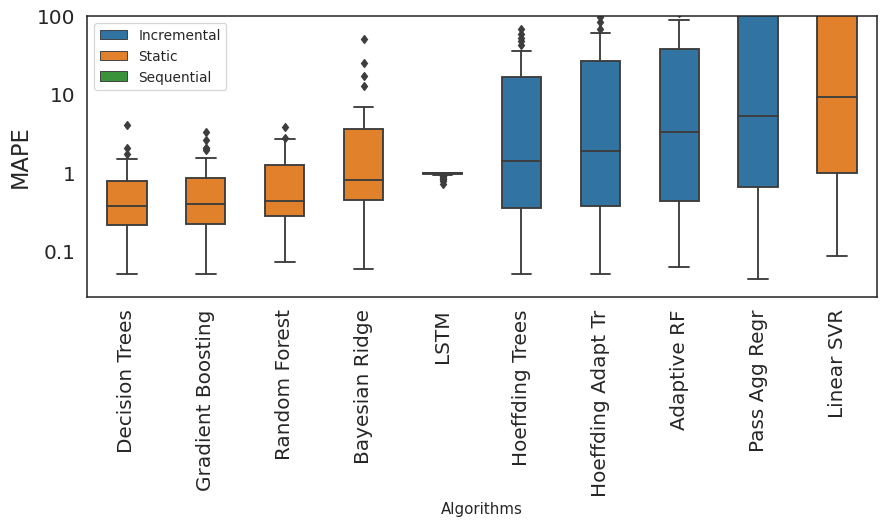

In [113]:
save_filename = 'fig1'
read_preprocess_plot_graph(exp1_filenames, col_mapper, save_filename, metric_type)

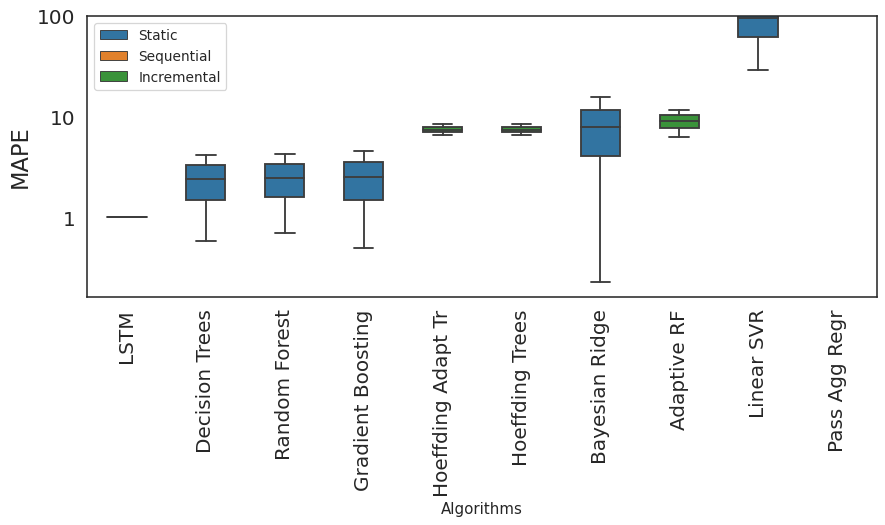

In [114]:
save_filename = 'fig2'
read_preprocess_plot_graph(exp2_filenames, col_mapper, save_filename,  metric_type)

In [115]:
!zip -r /content/Plots.zip /content/Plots
from google.colab import files
files.download("/content/Plots.zip")


updating: content/Plots/ (stored 0%)
updating: content/Plots/boxplots/ (stored 0%)
updating: content/Plots/boxplots/fig2.pdf (deflated 32%)
updating: content/Plots/boxplots/fig1.pdf (deflated 38%)
updating: content/Plots/barplot/ (stored 0%)
updating: content/Plots/barplot/top_selected_country_cases.pdf (deflated 32%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>